## Predicting the Progression of Cancerous Tumors in Mice: A Machine and Deep Learning Intuition

### Authors: Dr Amit K Chattopadhyay , Dr Gillian Pearce and Aimee Pascaline N Unkundiye

####  Department of Applied Mathematics and Data Science, Aston Centre for Artificial Intelligence Research and Applications (ACAIRA), Aston University, Aston Triangle, Birmingham, B4 7ET, United Kingdom



## Brief summary of document

This notebook describes the analysis of various datasets aimed at predicting the progression of cancerous tumors in mice using various machine learning, deep learning and mathematical models. The data used in this analysis comprises tumor volumes measured over time from different experiments when treated with different solutions. 


## Import modules and functions

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from scipy.optimize import curve_fit, fsolve

###  

In [34]:

# Used datasets
df = pd.read_csv('/Users/pracyaim/Downloads/saline700.csv')
df1 = pd.read_csv('/Users/pracyaim/Downloads/Mnps800.csv')
df2= pd.read_csv('/Users/pracyaim/Downloads/mnpfdg700.csv')
df3= pd.read_csv('/Users/pracyaim/Downloads/Untreated800.csv')
df4 = pd.read_csv('/Users/pracyaim/Downloads/Saline638Qi.csv')

df.columns = ['Time','Volume']
df1.columns = ['Time','Volume']
df2.columns = ['Time','Volume']
df3.columns = ['Time','Volume'] 
df4.columns = ['Time','Volume'] 


FileNotFoundError: [Errno 2] No such file or directory: '/Users/pracyaim/Downloads/saline700.csv'

 # 0

In [ ]:
# Box Plots, Distributions on few datasets to provr there are no outliers

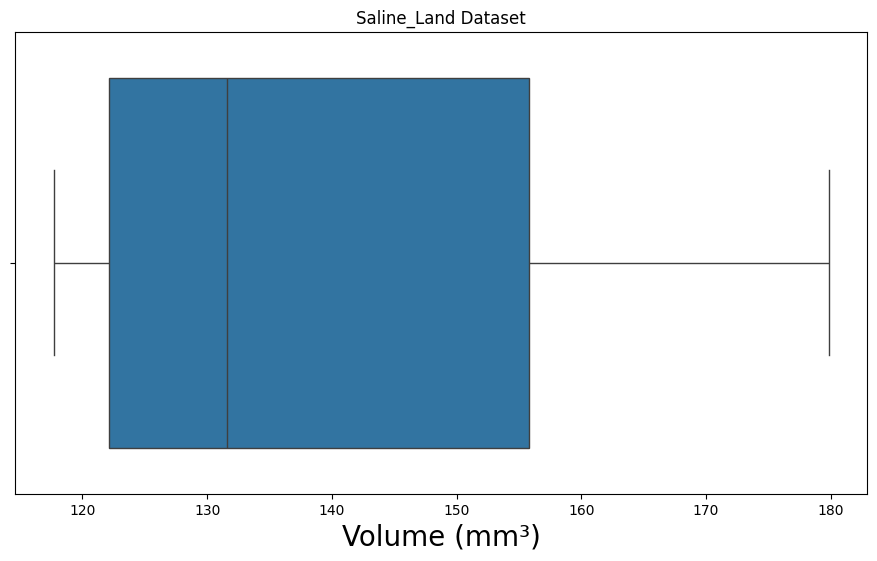

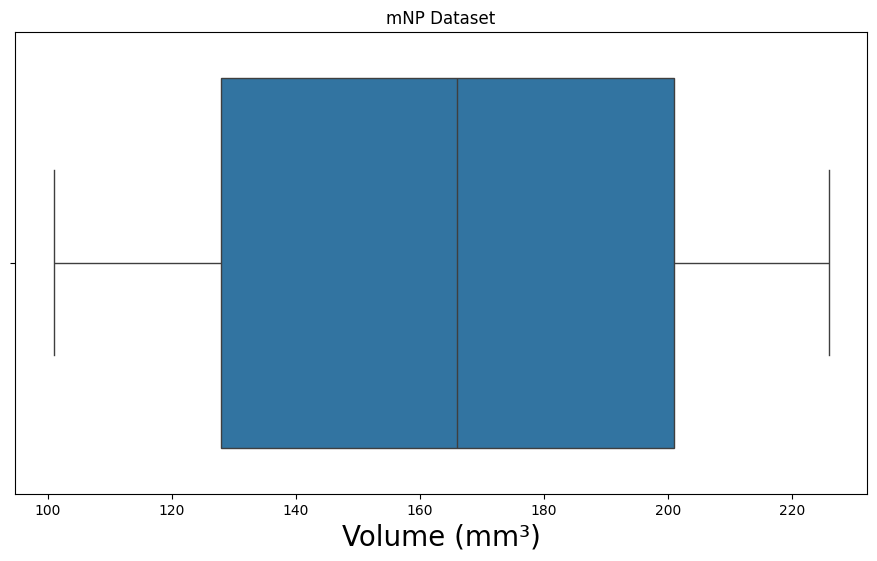

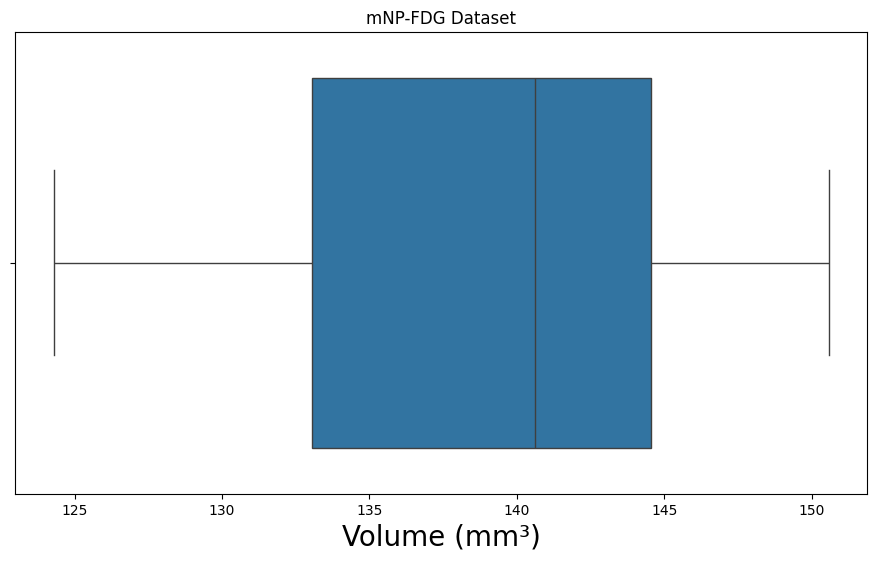

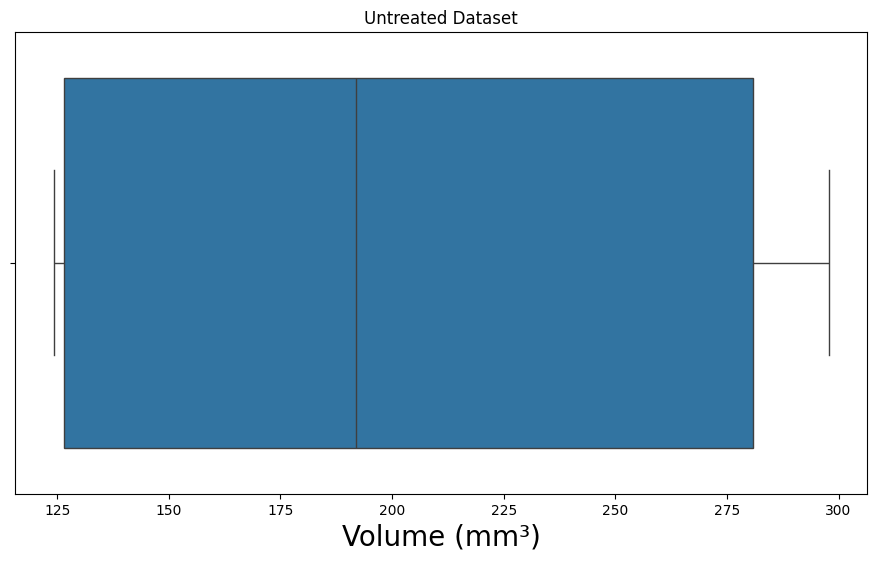

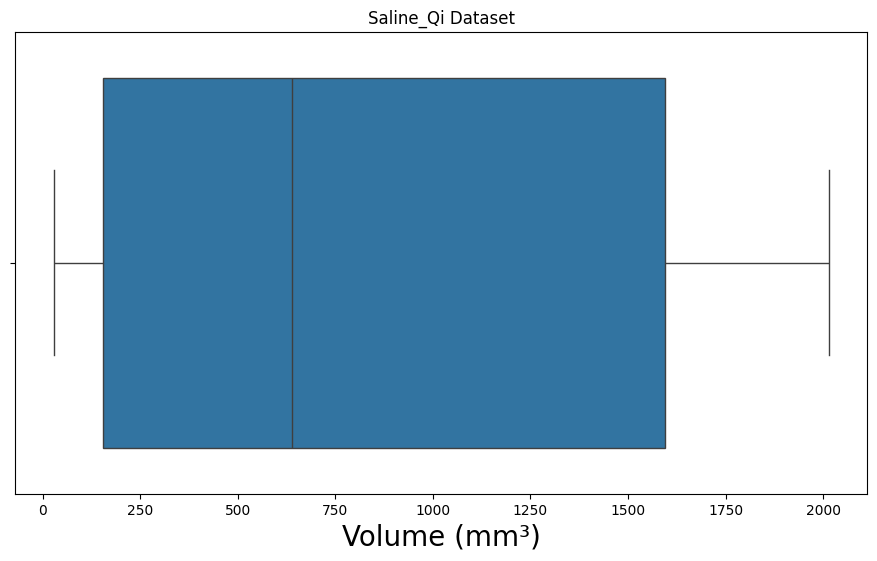

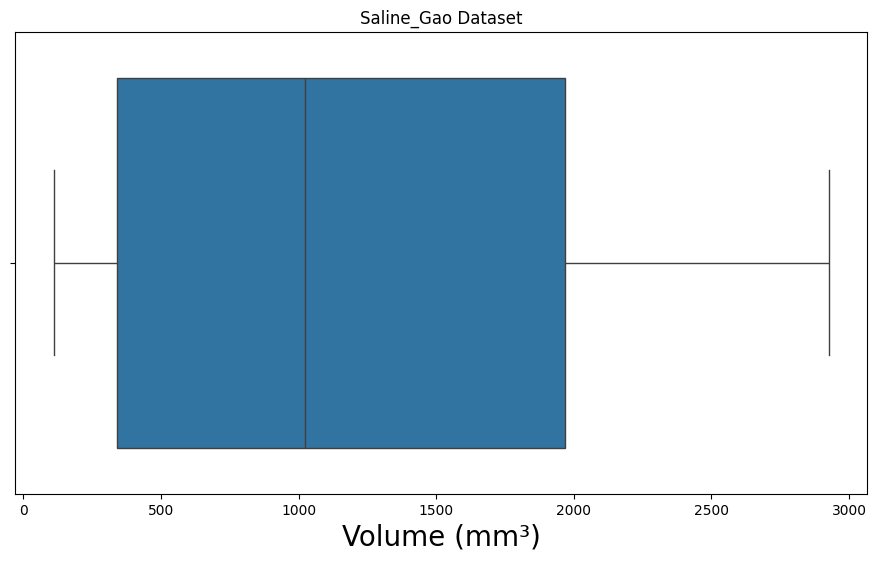

In [3]:
import seaborn as sns

# Define a function to plot box plots
def plot_box(df, title):
    plt.figure(figsize=(11, 6))
    sns.boxplot(x='Volume', data=df)
    plt.title(title)
    plt.xlabel('Volume (mm³)',fontsize=20)
    
    plt.show()

# Plotting box plots for each dataset
plot_box(df, 'Saline_Land Dataset')
plot_box(df1, 'mNP Dataset')
plot_box(df2, 'mNP-FDG Dataset')
plot_box(df3, 'Untreated Dataset')

plot_box(df4, 'Saline_Qi Dataset')
plot_box(df5, 'Saline_Gao Dataset')

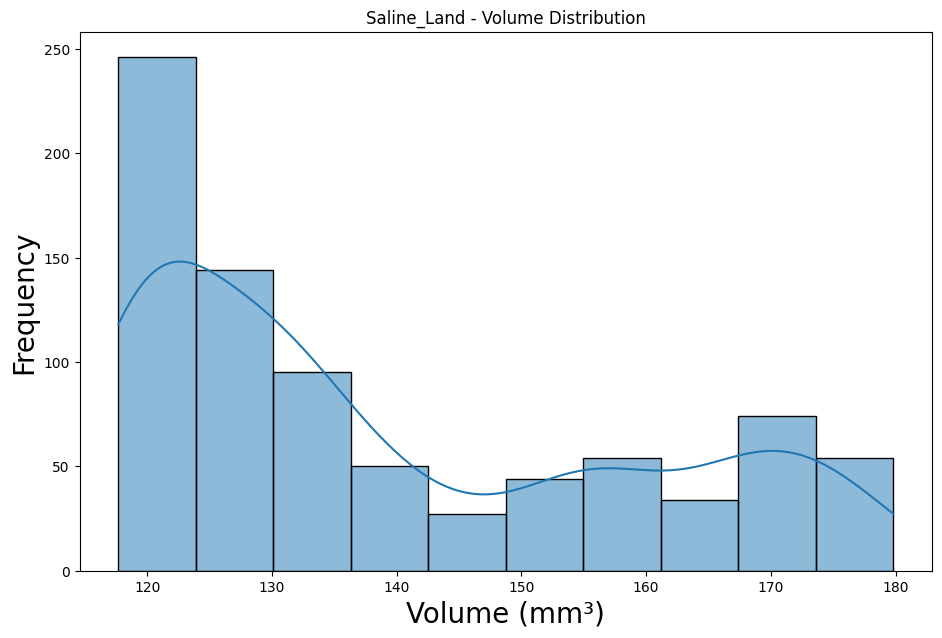

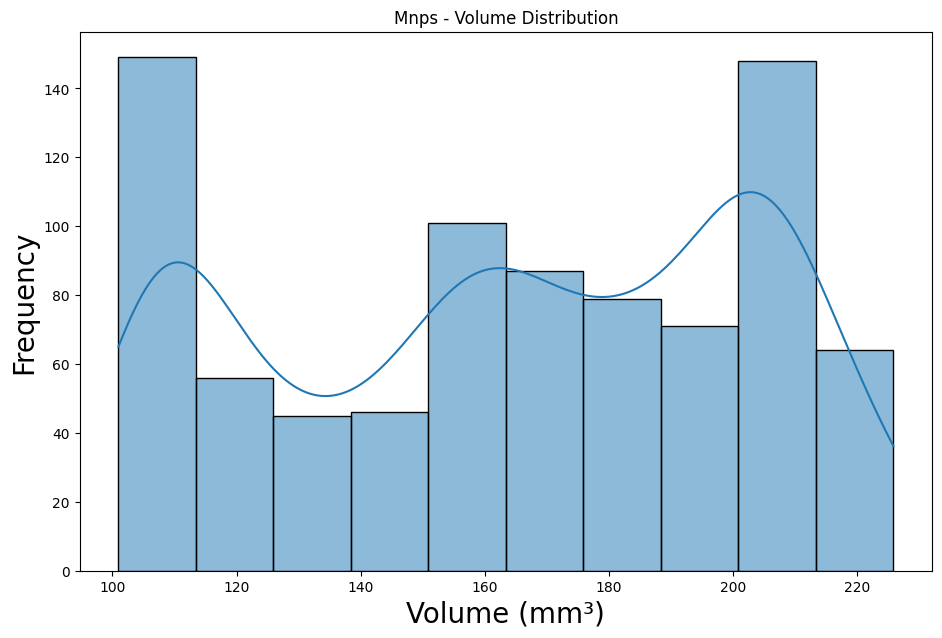

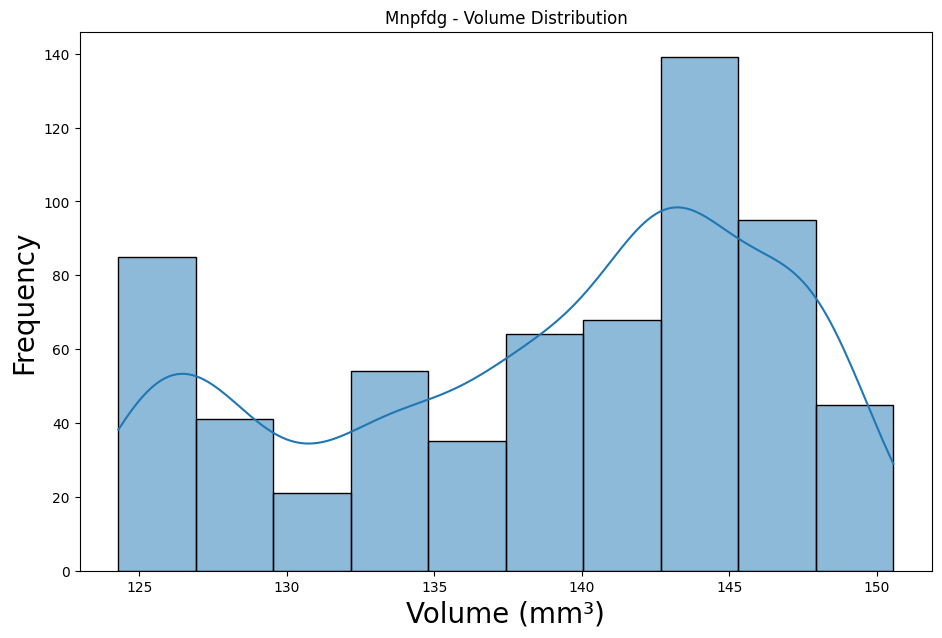

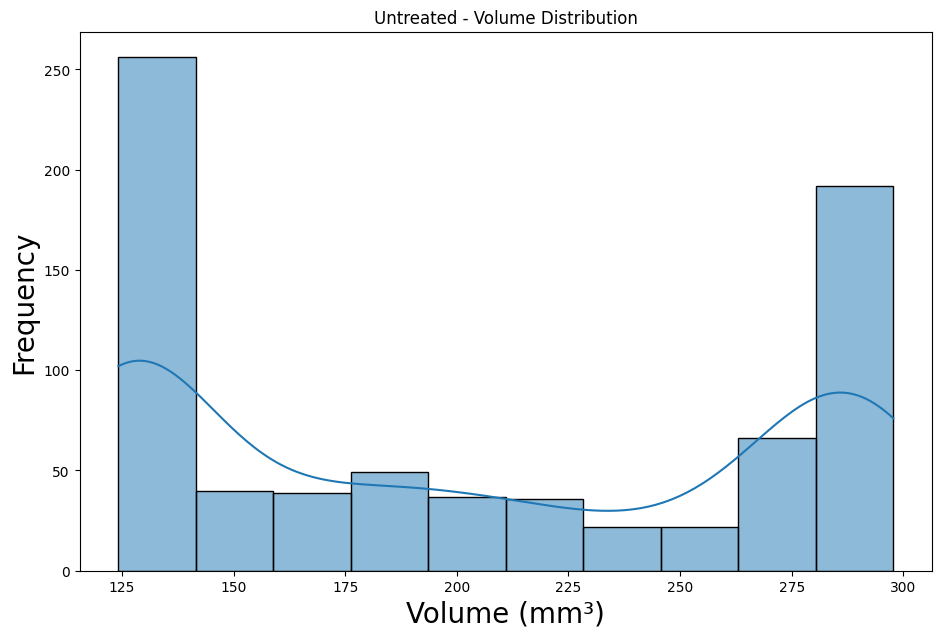

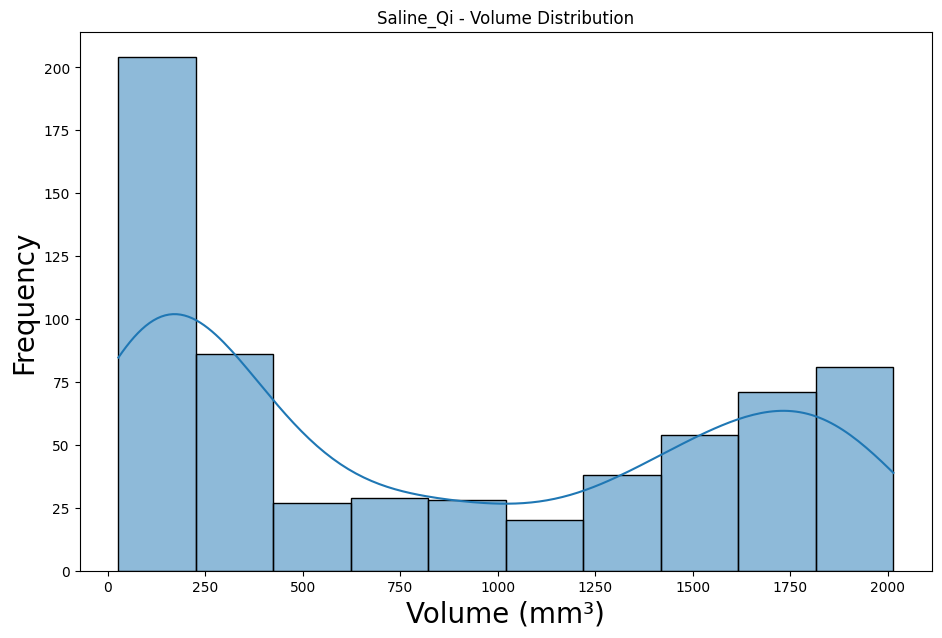

In [4]:
import seaborn as sns

# Plotting histograms for each dataset
for dataset, title in zip([df, df1, df2, df3,df4], ['Saline_Land', 'Mnps', 'Mnpfdg', 'Untreated','Saline_Qi']):
    plt.figure(figsize=(11, 7))
    sns.histplot(dataset['Volume'], bins=10, kde=True)
    plt.title(f'{title} - Volume Distribution')
    plt.xlabel('Volume (mm³)',fontsize=20)
    plt.ylabel('Frequency',fontsize=20)
    
    plt.show()


# 1 

###  1(a)

In [7]:
# Used datasets
df = pd.read_csv('/Users/pracyaim/Downloads/Saline85.csv')
df1 = pd.read_csv('/Users/pracyaim/Downloads/mnps85.csv')
df2= pd.read_csv('/Users/pracyaim/Downloads/mnpfdg85.csv')
df3= pd.read_csv('/Users/pracyaim/Downloads/Untreated85.csv')

df.columns = ['Time','Volume']
df1.columns = ['Time','Volume']
df2.columns = ['Time','Volume']
df3.columns = ['Time','Volume'] 

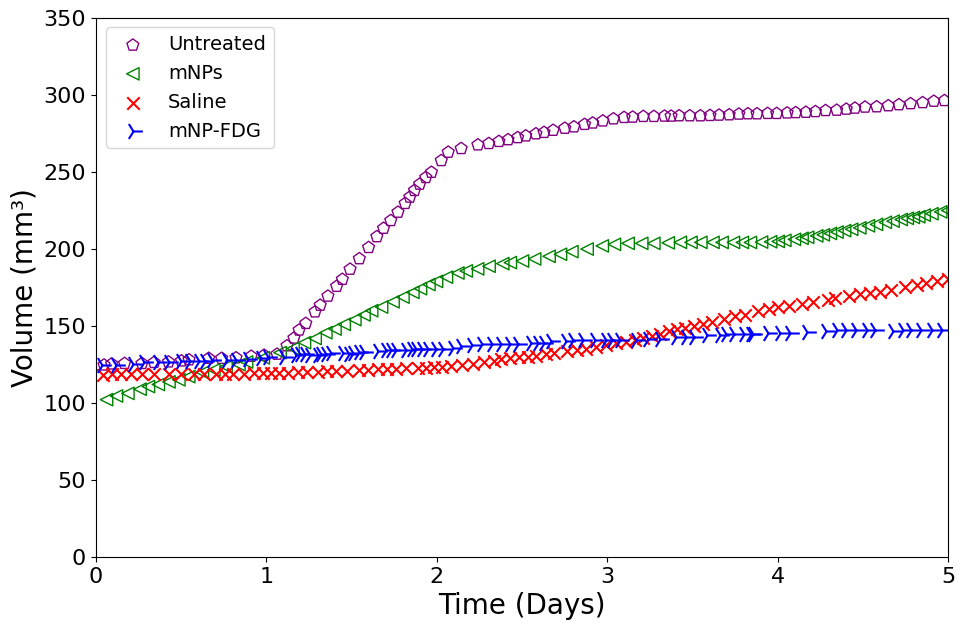

In [8]:
# Plotting the data
plt.figure(figsize=(11, 7))

# Plotting  Land, et al's Time evolution of tumor volumes in mice using various forms of treatment 
plt.scatter(df3['Time'], df3['Volume'], color='purple',s= 80, marker='p',linestyle='None', facecolors='None', label='Untreated')
plt.scatter(df1['Time'], df1['Volume'], color='green', s= 80,marker='<', linestyle='None', facecolors='None', label='mNPs')
plt.scatter(df['Time'], df['Volume'], color='red',s= 80, marker='x', label='Saline')
plt.scatter(df2['Time'], df2['Volume'],  color='blue',s= 180,marker='4',label='mNP-FDG')

plt.xlim(0, 5)
plt.ylim(0,350)
plt.xlabel('Time (Days)', fontsize=20)
plt.ylabel('Volume (mm³)', fontsize=20)
plt.xticks(fontsize=16 )
plt.yticks(fontsize=16)

# Add legend and grid
plt.legend(fontsize = 14)
plt.grid(False)

# Show the plot
plt.show()

### 1(b)

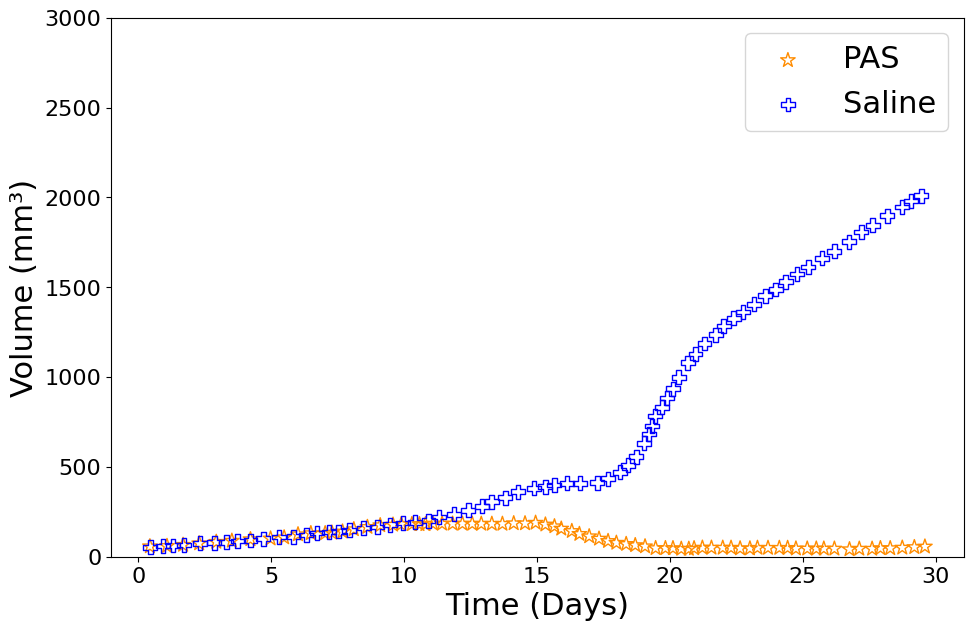

In [9]:

# Used datasets
Saline_Qi = pd.read_csv('/Users/pracyaim/Downloads/QI70.csv')
PAS = pd.read_csv('/Users/pracyaim/Downloads/pAS70.csv')


Saline_Qi.columns=['Time','Volume']
PAS.columns = ['Time','Volume']

# Plotting the data
plt.figure(figsize=(11, 7))


# Plotting Qi, et al's time evolution of tumor volumes in mice using various forms of treatment
plt.scatter(PAS['Time'], PAS['Volume'], color='darkorange', marker='*', linestyle='None', facecolors='None', s=120, label='PAS')
plt.scatter(Saline_Qi['Time'], Saline_Qi['Volume'], color='blue', marker='P', linestyle='None', facecolors='None',  s=100, label='Saline')


plt.ylim(0, 3000)
plt.xlabel('Time (Days)', fontsize=22)
plt.ylabel('Volume (mm³)', fontsize=22)

# Add legend and grid
plt.legend(fontsize=22)
plt.xticks(fontsize=16 )
plt.yticks(fontsize=16)
plt.grid(False)

# Show the plot
plt.show()

### 1(c)

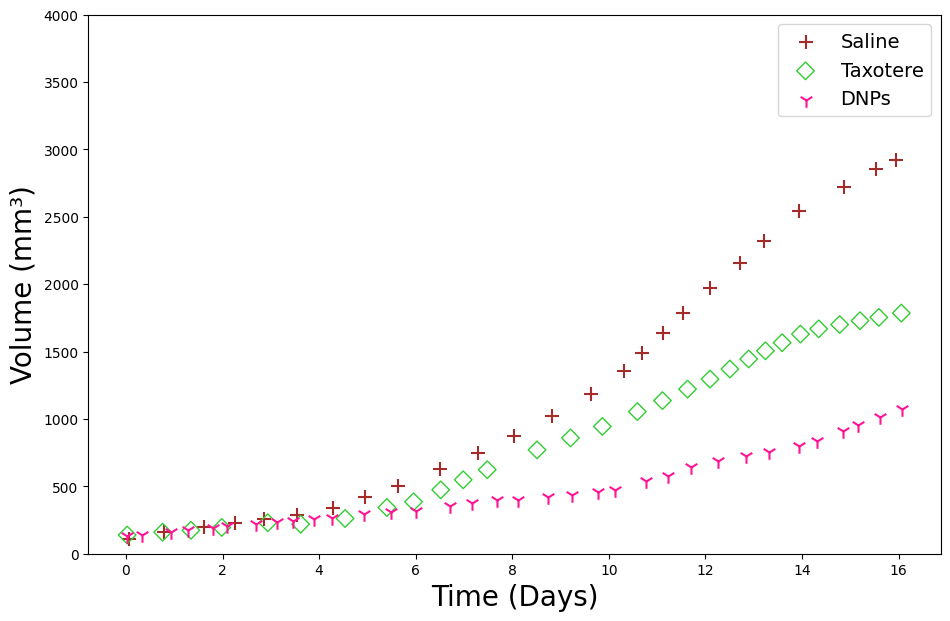

In [10]:
# Used datasets
df = pd.read_csv('/Users/pracyaim/Downloads/Salinegao.csv')
df1 = pd.read_csv('/Users/pracyaim/Downloads/dnp.csv')
df2= pd.read_csv('/Users/pracyaim/Downloads/Taxotere.csv')


df.columns = ['Time','Volume']
df1.columns = ['Time','Volume']
df2.columns = ['Time','Volume']

# Plotting the Extracted Gao's data
plt.figure(figsize=(11, 7))
plt.scatter(df['Time'], df['Volume'], color='brown', s= 100,marker='+', label="Saline")
plt.scatter(df2['Time'], df2['Volume'],  color='limegreen', marker='D',s= 80,linestyle='None', facecolors='None',label='Taxotere')
plt.scatter(df1['Time'], df1['Volume'], color='deeppink',marker='1', s=110, label='DNPs')
plt.xlabel('Days Post Injection')
plt.ylabel('Tumour Volume (mm^3)')
plt.ylim(0,4000)
plt.xlabel('Time (Days)', fontsize=20)
plt.ylabel('Volume (mm³)', fontsize=20)

# Add legend and grid
plt.legend(fontsize = 14)
plt.grid(False)

# Show the plot
plt.show()

### 1(d)

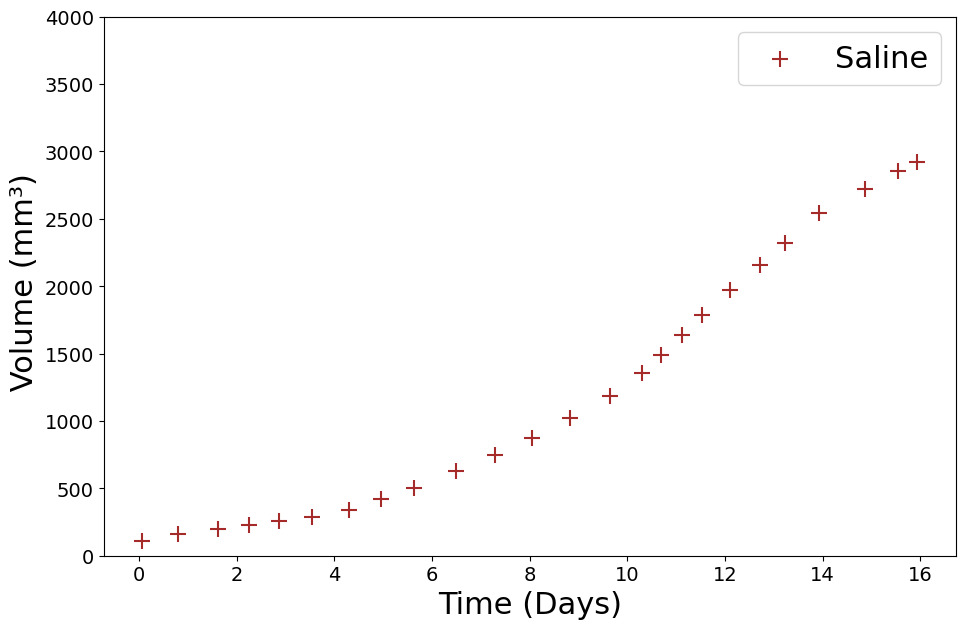

In [11]:
# Used datasets
PAS = pd.read_csv('/Users/pracyaim/Downloads/salinegao.csv')
PAS.columns = ['Time','Volume']

# Plotting Gao's extracted Saline
plt.figure(figsize=(11, 7))
plt.scatter(PAS['Time'], PAS['Volume'],  color='brown', s= 120,marker='+', label="Saline")

# Title and Labels
plt.xlabel('Days Post Injection')
plt.ylabel('Tumour Volume (mm³)')
plt.ylim(0, 4000)
plt.xlabel('Time (Days)', fontsize=22)
plt.ylabel(' Volume (mm³)', fontsize=22)
plt.xticks(fontsize=14 )
plt.yticks(fontsize=14)
plt.legend(fontsize=22)
plt.grid(False)
plt.show()

# 2

### 2.(a)

/var/folders/2y/4l86jv4d5839q8pz_dv0lqq40000gn/T/ipykernel_13427/277592105.py:62: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


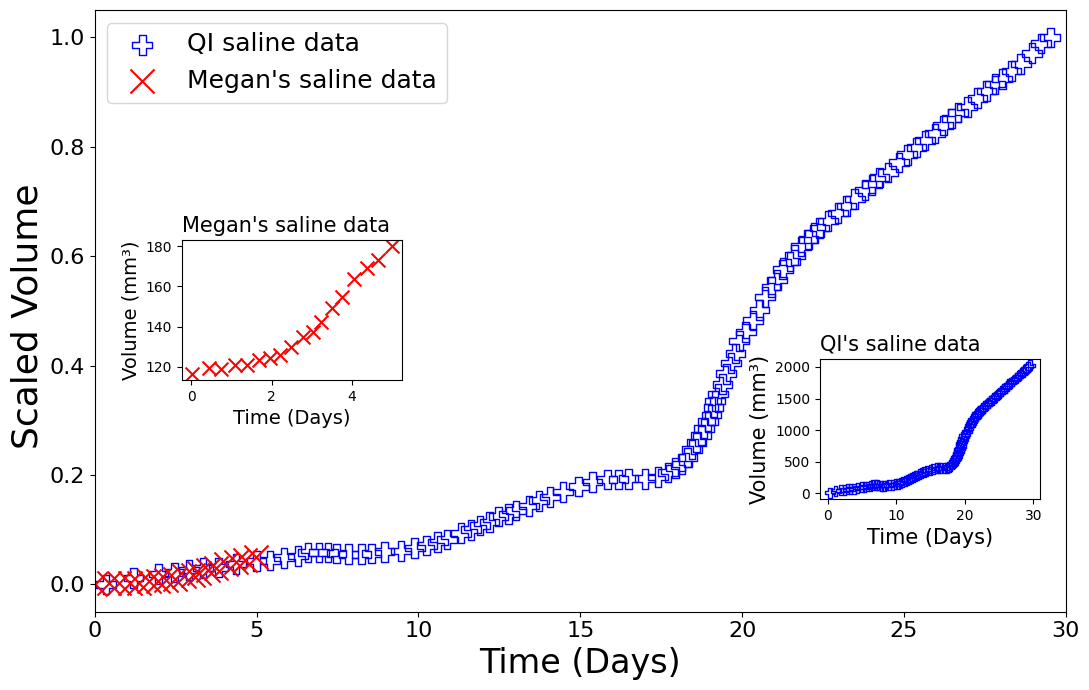

In [12]:

# Used datasets
df = pd.read_csv('/Users/pracyaim/Downloads/Saline19.csv')
Saline_Qi = pd.read_csv('/Users/pracyaim/Downloads/QI100.csv')

df.columns = ['Time','Volume']
Saline_Qi.columns=['Time','Volume']

scaler =MinMaxScaler()
scaled_df=scaler.fit_transform(df)
scaled_Saline_Qi= scaler.fit_transform(Saline_Qi)

XM_train, yM_train =df.iloc[:, :-1], scaled_df[:, -1]
XQ_train, yQ_train =Saline_Qi.iloc[:, :-1], scaled_Saline_Qi[:, -1]

# Shifting and scaling factor to be applied
shifting_factor =  0
scaling_factor = 0.05

# Adding the shifting factor to yM_train 
XM_train_shifted = XM_train 
yM_train_shifted = (yM_train *scaling_factor) +shifting_factor


# Main figure
fig, ax = plt.subplots(figsize=(11, 7))
# Scatter plot for Min-Max scaled data from Land, et al overlaid on scaled data from Qi, et al 
ax.scatter(XQ_train, yQ_train, color='blue',  marker='P', linestyle='None', facecolors='None', s=200, label='QI saline data')
ax.scatter(XM_train_shifted, yM_train_shifted, color='red', marker='x', s=300, label="Megan's saline data")

#Qi's set of axes for smaller scatter plot
left, bottom, width, height = [0.75, 0.28, 0.20, 0.20]  # Adjust these coordinates as needed
ax_inset = fig.add_axes([left, bottom, width, height])
ax_inset.scatter(Saline_Qi['Time'], Saline_Qi['Volume'], color='blue',  marker='P', linestyle='None', facecolors='None',  s=50)


# Limits and Labels for Qi inset axes
ax_inset.set_xlabel('Time (Days)', fontsize=15)
ax_inset.set_ylabel('Volume (mm³)', fontsize=15)
ax_inset.set_title("QI's saline data", fontsize=15, loc='left')
ax.legend(fontsize=17)
ax.legend(loc='upper left',fontsize=17 )

# Megan's set of axes for smaller scatter plot
left, bottom, width, height = [0.17, 0.45, 0.20, 0.20]  # Adjust these coordinates as needed
ax_inset = fig.add_axes([left, bottom, width, height])
ax_inset.scatter(df['Time'], df['Volume'], color='red', marker='x', s=100)

#  limits and labels for Meg inset axes
ax_inset.set_xlabel('Time (Days)', fontsize=14)
ax_inset.set_ylabel('Volume (mm³)', fontsize=14)
ax_inset.set_title("Megan's saline data", fontsize=15, loc='left')
ax.legend(loc='best', fontsize=18)

# Labels and title for the main plot
ax.set_xlabel('Time (Days)', fontsize=24)
ax.set_xlim(0, 30)
ax.set_ylabel('Scaled Volume ', fontsize=26)
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=16)

# Show the plot
plt.tight_layout()
plt.show()

### 2.(b)

/var/folders/2y/4l86jv4d5839q8pz_dv0lqq40000gn/T/ipykernel_13427/4160842077.py:64: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


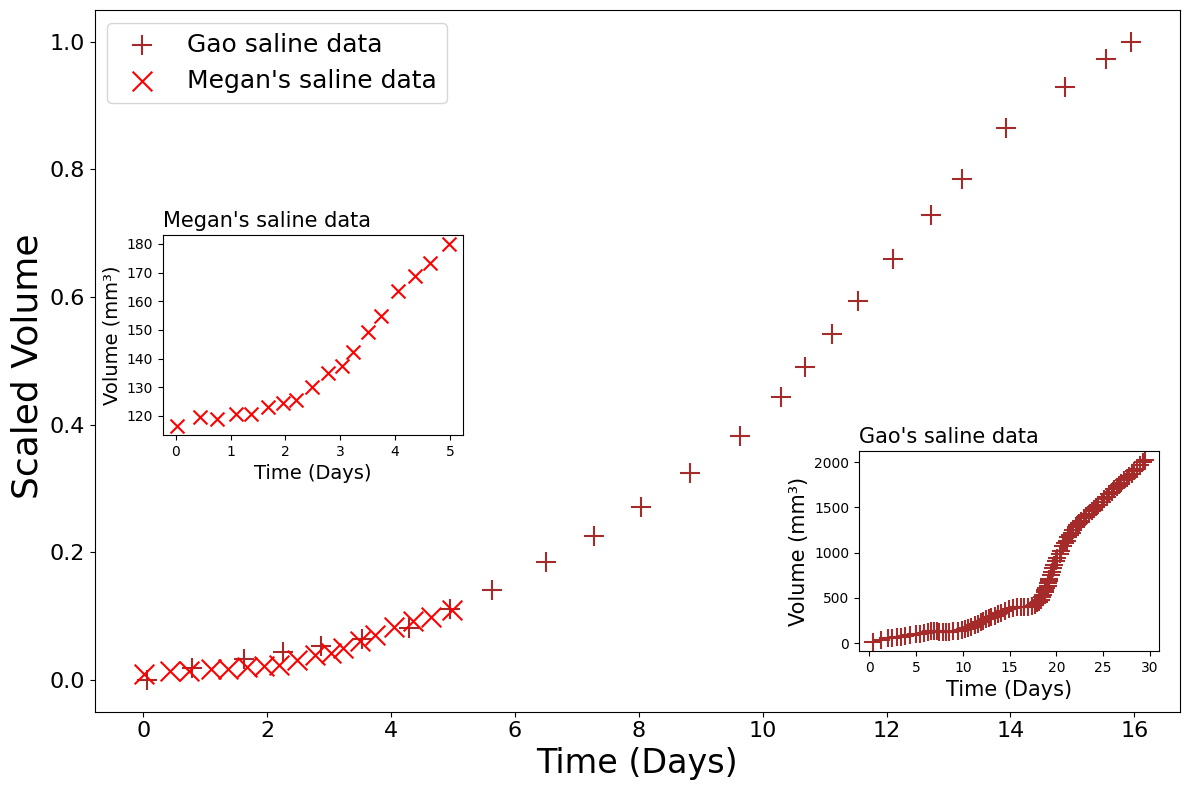

In [13]:
# Used datasets
df = pd.read_csv('/Users/pracyaim/Downloads/Saline19.csv')
Saline_gao = pd.read_csv('/Users/pracyaim/Downloads/salinegao.csv')

df.columns = ['Time','Volume']
Saline_gao.columns=['Time','Volume']


scaler =MinMaxScaler()
scaled_df=scaler.fit_transform(df)
scaled_saline_gao= scaler.fit_transform(Saline_gao)

XM_train, yM_train =df.iloc[:, :-1], scaled_df[:, -1]
XQ_train, yQ_train =Saline_gao.iloc[:, :-1], scaled_saline_gao[:, -1]

# Shifting and scaling factor to be applied
shifting_factor =  0.0095
scaling_factor = 0.1

# Adding the shifting factor to yQ_train and yQ_test
XM_train_shifted =( XM_train * 1 ) 
yM_train_shifted = (yM_train *scaling_factor) +shifting_factor

# Main figure
fig, ax = plt.subplots(figsize=(12, 8))

 
# Scatter plot for Land, et al's data overlaid on scaled data from Gao, et al 
ax.scatter(XQ_train, yQ_train,   color='brown', s= 200,marker='+',  label='Gao saline data')
ax.scatter(XM_train_shifted, yM_train_shifted, color='red', marker='x', s=200, label="Megan's saline data")

#Gao's set of axes for smaller scatter plot
left, bottom, width, height = [0.72, 0.18, 0.25, 0.25]  # Adjust these coordinates as needed
ax_inset = fig.add_axes([left, bottom, width, height])
ax_inset.scatter(Saline_Qi['Time'], Saline_Qi['Volume'],  color='brown',marker='+', s=150)


# Limits and Labels for Gao inset axes
ax_inset.set_xlabel('Time (Days)', fontsize=15)
ax_inset.set_ylabel('Volume (mm³)', fontsize=15)
ax_inset.set_title("Gao's saline data", fontsize=15, loc='left')
ax.legend(fontsize=17)
ax.legend(loc='upper left',fontsize=17 )

# Land's set of axes for smaller scatter plot
left, bottom, width, height = [0.14, 0.45, 0.25, 0.25]  # Adjust these coordinates as needed
ax_inset = fig.add_axes([left, bottom, width, height])
ax_inset.scatter(df['Time'], df['Volume'], color='red', marker='x', s=100)

#  limits and labels for Land inset axes
ax_inset.set_xlabel('Time (Days)', fontsize=14)
ax_inset.set_ylabel('Volume (mm³)', fontsize=14)
ax_inset.set_title("Megan's saline data", fontsize=15, loc='left')

# Legend for the main plot
ax.legend(loc='best', fontsize=18)

# Labels and title for the main plot
ax.set_xlabel('Time (Days)', fontsize=24)
ax.set_ylabel('Scaled Volume ', fontsize=26)
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=16)
# Show the plot
plt.tight_layout()

plt.show()

# 3

### 3.(a,b)

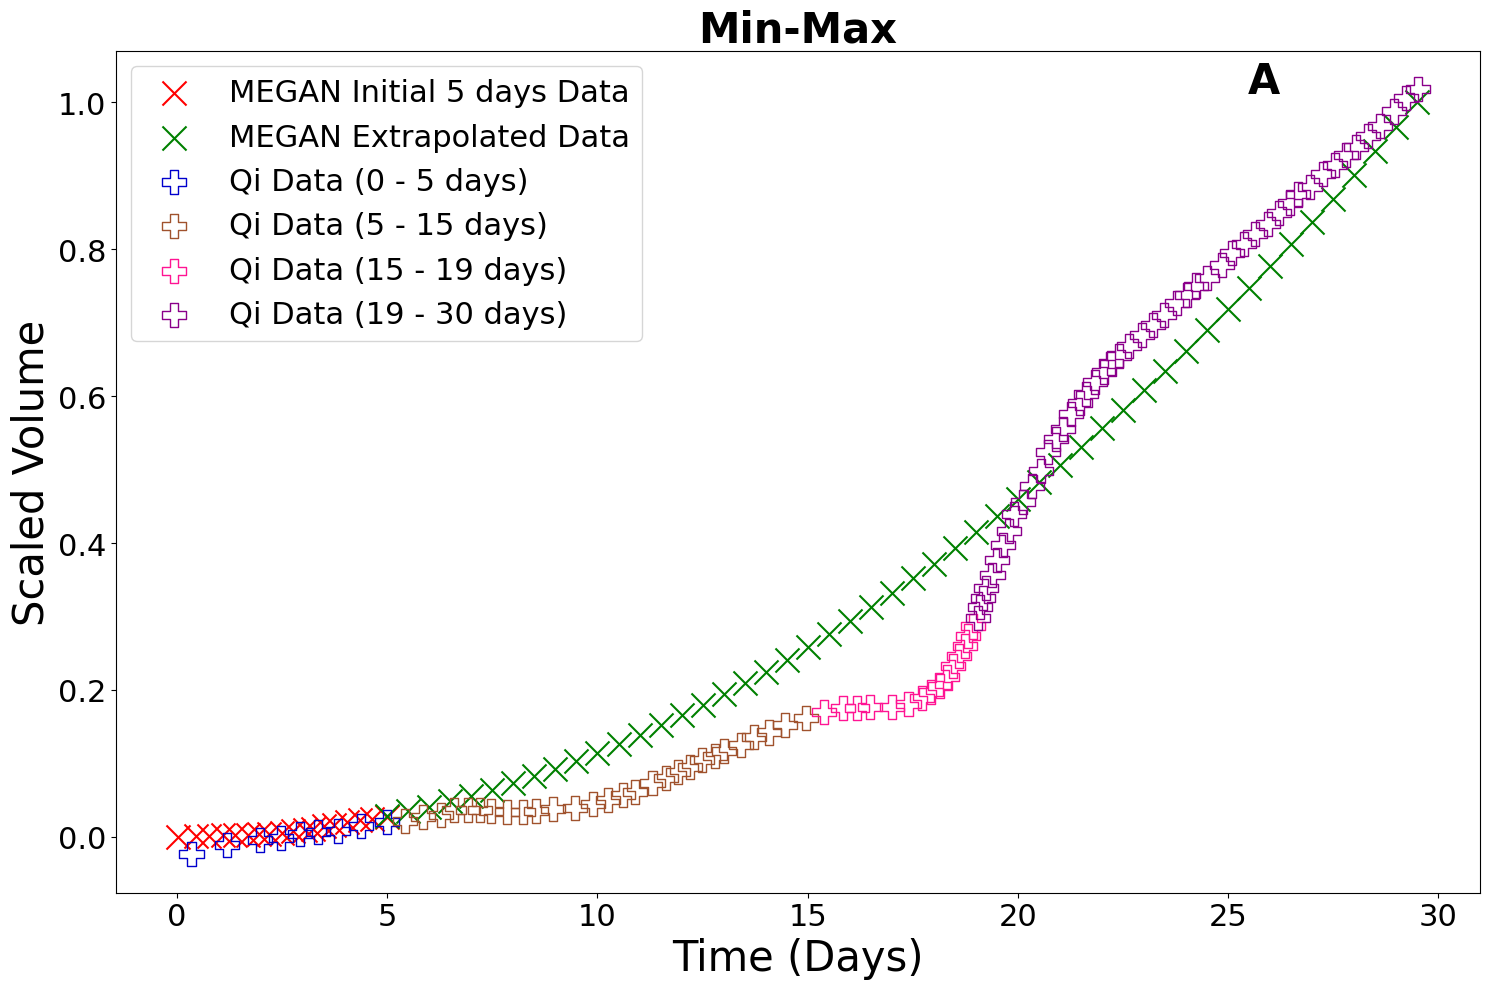

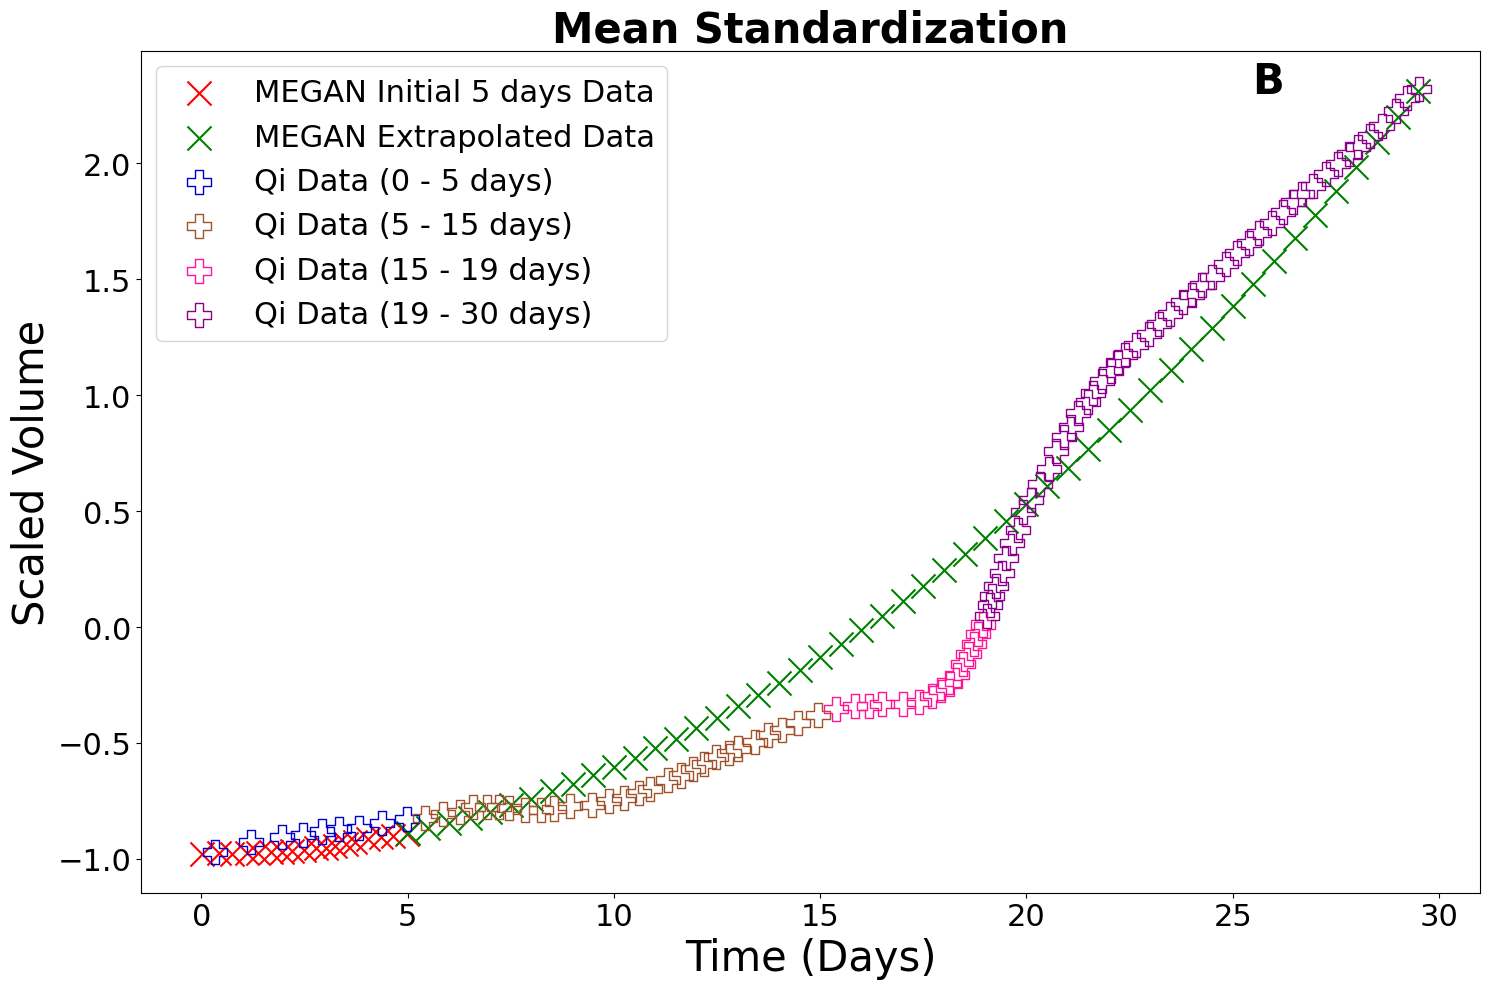

In [14]:
# Used datasets
df = pd.read_csv('/Users/pracyaim/Downloads/Saline19.csv')
df_Q = pd.read_csv('/Users/pracyaim/Downloads/Qi100.csv')


df_Q.columns = ['Time', 'Volume']
df.columns = ['Time', 'Volume']

# Define scalers
scalers = {
    'Min-Max': MinMaxScaler(),
    'Mean Standardization': StandardScaler()
}

# Train-test split for the original dataset
X_train, X_test, y_train, y_test = train_test_split(df['Time'].values.reshape(-1, 1), df['Volume'], test_size=0.2, random_state=42)

# Train the model on the first dataset
model = SVR(kernel='poly', degree=2)  # Using SVR with a polynomial kernel of degree 2
model.fit(X_train, y_train)

# Creating a new DataFrame df_new with 'Time' from 5 to 29.5 days
time_values = np.linspace(5, 29.5, 50)
df_new = pd.DataFrame({'Time': time_values})

# Predicting using the trained model on the new data
predictions_new = model.predict(df_new['Time'].values.reshape(-1, 1))

# Add predictions to the new DataFrame
df_new['Volume'] = predictions_new

# Combine df and df_new
df_combined = pd.concat([df, df_new])
df_combined_unscaled = df_combined.copy()

# Define segments for df_Q
segments = {
    '0 - 5 days': (0, 5),
    '5 - 15 days': (5, 15),
    '15 - 19 days': (15, 19),
    '19 - 30 days': (19, 30)
}

# Extract data for each segment
df_Q_segments = {key: df_Q[(df_Q['Time'] > start) & (df_Q['Time'] <= end)].copy() for key, (start, end) in segments.items()}

# Define shifting and scaling factors for each scaler
shifting_scaling_factors = {
    'Min-Max': (0.03, 1.2),
    'Mean Standardization': (0.33, 1.15)
}

# Plotting Min-Max and Mean Standardization separately
for i, (scaler_name, scaler) in enumerate(scalers.items()):
    # Scale the 'Volume' column only for the combined dataset
    df_combined_scaled = df_combined.copy()
    df_combined_scaled['Volume'] = scaler.fit_transform(df_combined[['Volume']].values.reshape(-1, 1)).flatten()
    
    # Scale only the 'Volume' column for each segment of df_Q
    scaled_df_Q_segments = {}
    for key, segment in df_Q_segments.items():
        scaled_segment = segment.copy()
        scaled_segment['Volume'] = scaler.transform(segment[['Volume']].values.reshape(-1, 1)).flatten()
        scaled_df_Q_segments[key] = scaled_segment

    # Apply shifting and scaling factors to Qi data
    shifting_factor, scaling_factor = shifting_scaling_factors[scaler_name]
    for key in scaled_df_Q_segments:
        scaled_df_Q_segments[key]['Volume'] = scaled_df_Q_segments[key]['Volume'] * scaling_factor + shifting_factor

    # Extract data for plotting
    X_combined = df_combined_unscaled['Time'].values
    y_combined = df_combined_scaled['Volume'].values

    # Plotting
    plt.figure(figsize=(15, 10))

    # Scatter plot for Land's original data
    plt.scatter(df['Time'], df_combined_scaled.iloc[:len(df), -1], color='red', marker='x', s=300, label='MEGAN Initial 5 days Data')

    # Scatter plot for Land's extrapolated data
    plt.scatter(df_new['Time'], df_combined_scaled.iloc[len(df):, -1], color='green', marker='x', s=300, label='MEGAN Extrapolated Data')

    #  Scatter plot for each segment of Qi data with different colors
    colors = ['mediumblue', 'sienna', 'deeppink', 'darkmagenta']
    for (key, segment), color in zip(scaled_df_Q_segments.items(), colors):
        X_segment = segment['Time'].values
        y_segment = segment['Volume'].values
        plt.scatter(X_segment, y_segment, color=color,  marker='P', linestyle='None', facecolors='None', s=300, label=f'Qi Data ({key})')

    # Set plot labels and title
    plt.xlabel('Time (Days)', fontsize=30 )
    plt.ylabel('Scaled Volume', fontsize=30)
    plt.title(scaler_name, fontsize=30, fontweight='bold')
    plt.legend(loc='upper left', fontsize=22)
    plt.text(0.83, 0.95, chr(65 + i), transform=plt.gca().transAxes, size=30, fontweight='bold')
    plt.xticks(fontsize=22 )
    plt.yticks(fontsize=22)
    
    plt.tight_layout()

    # Show plot
    plt.show()

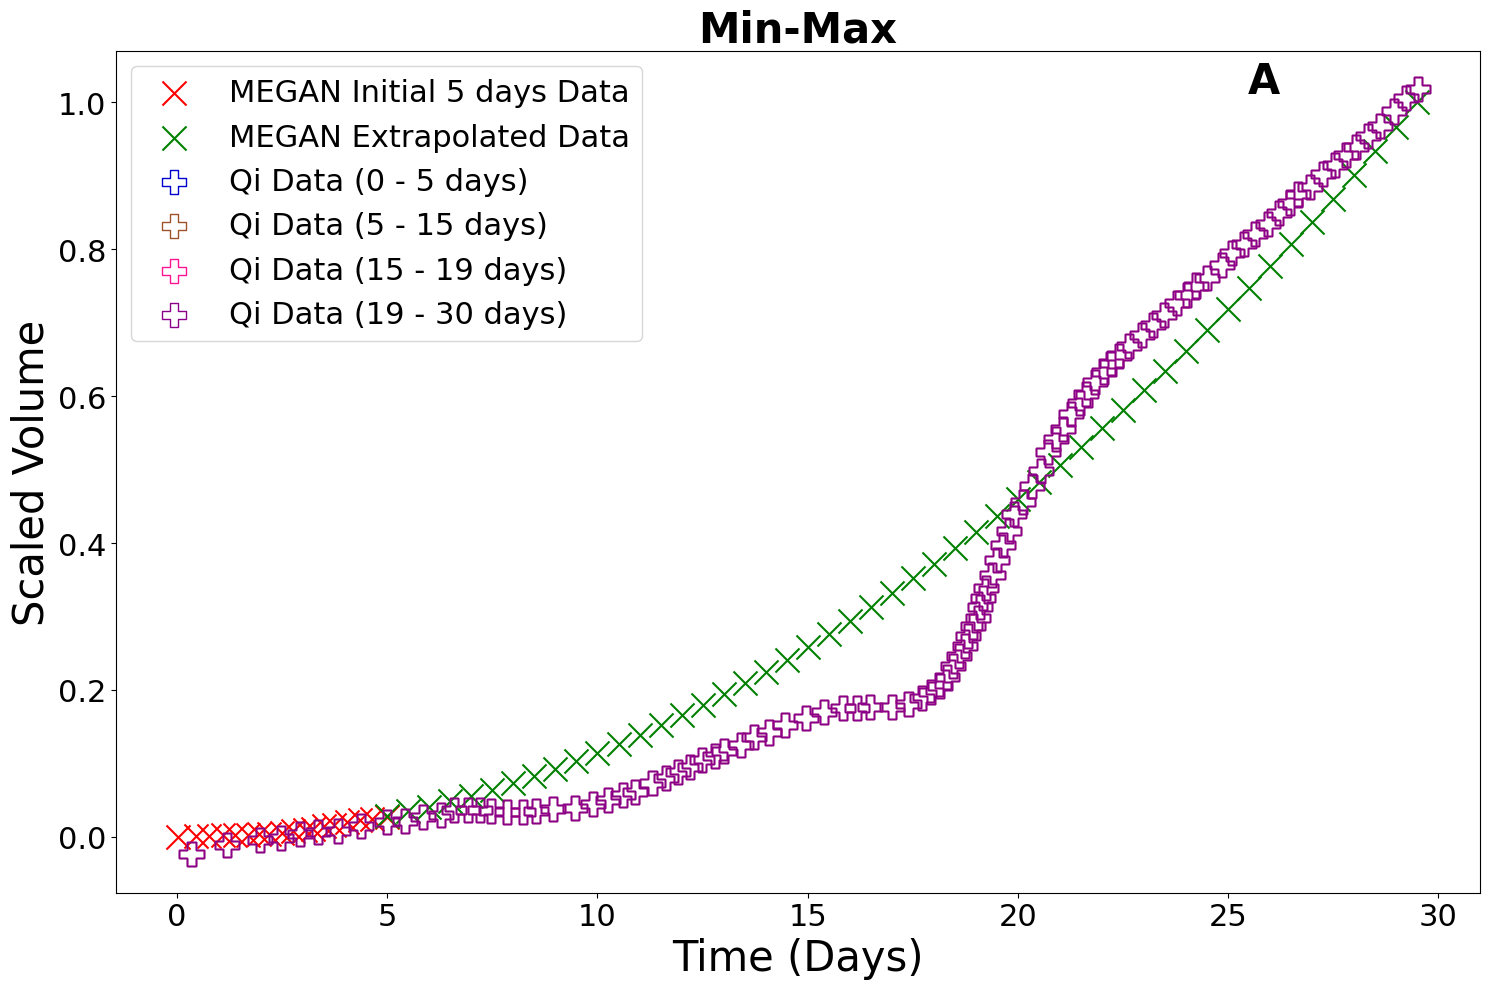

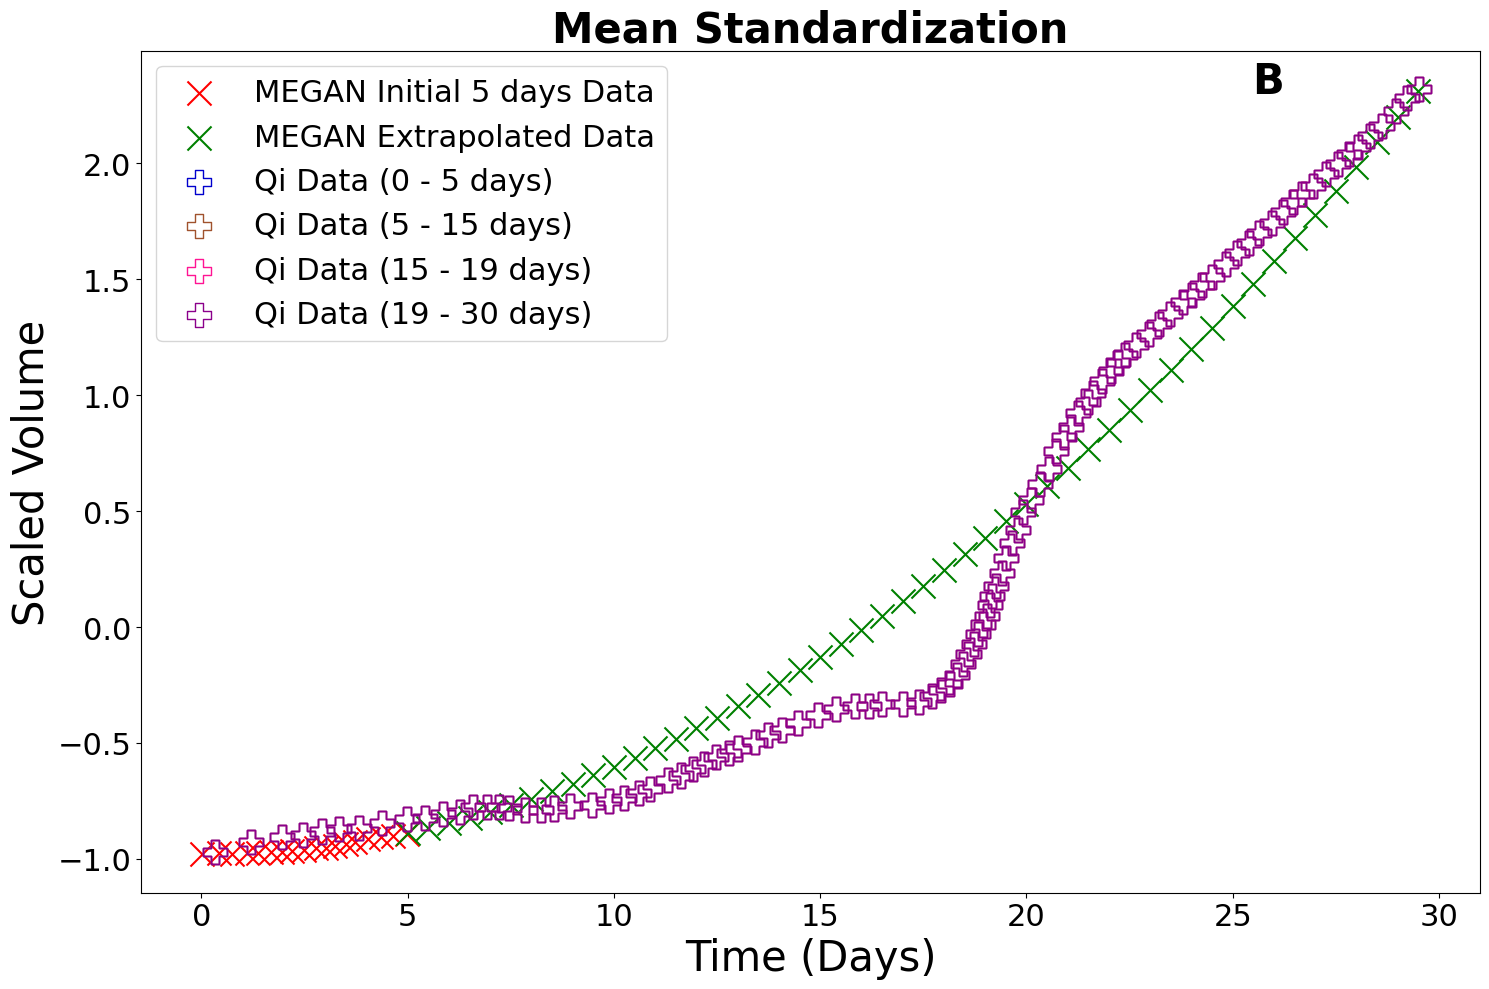

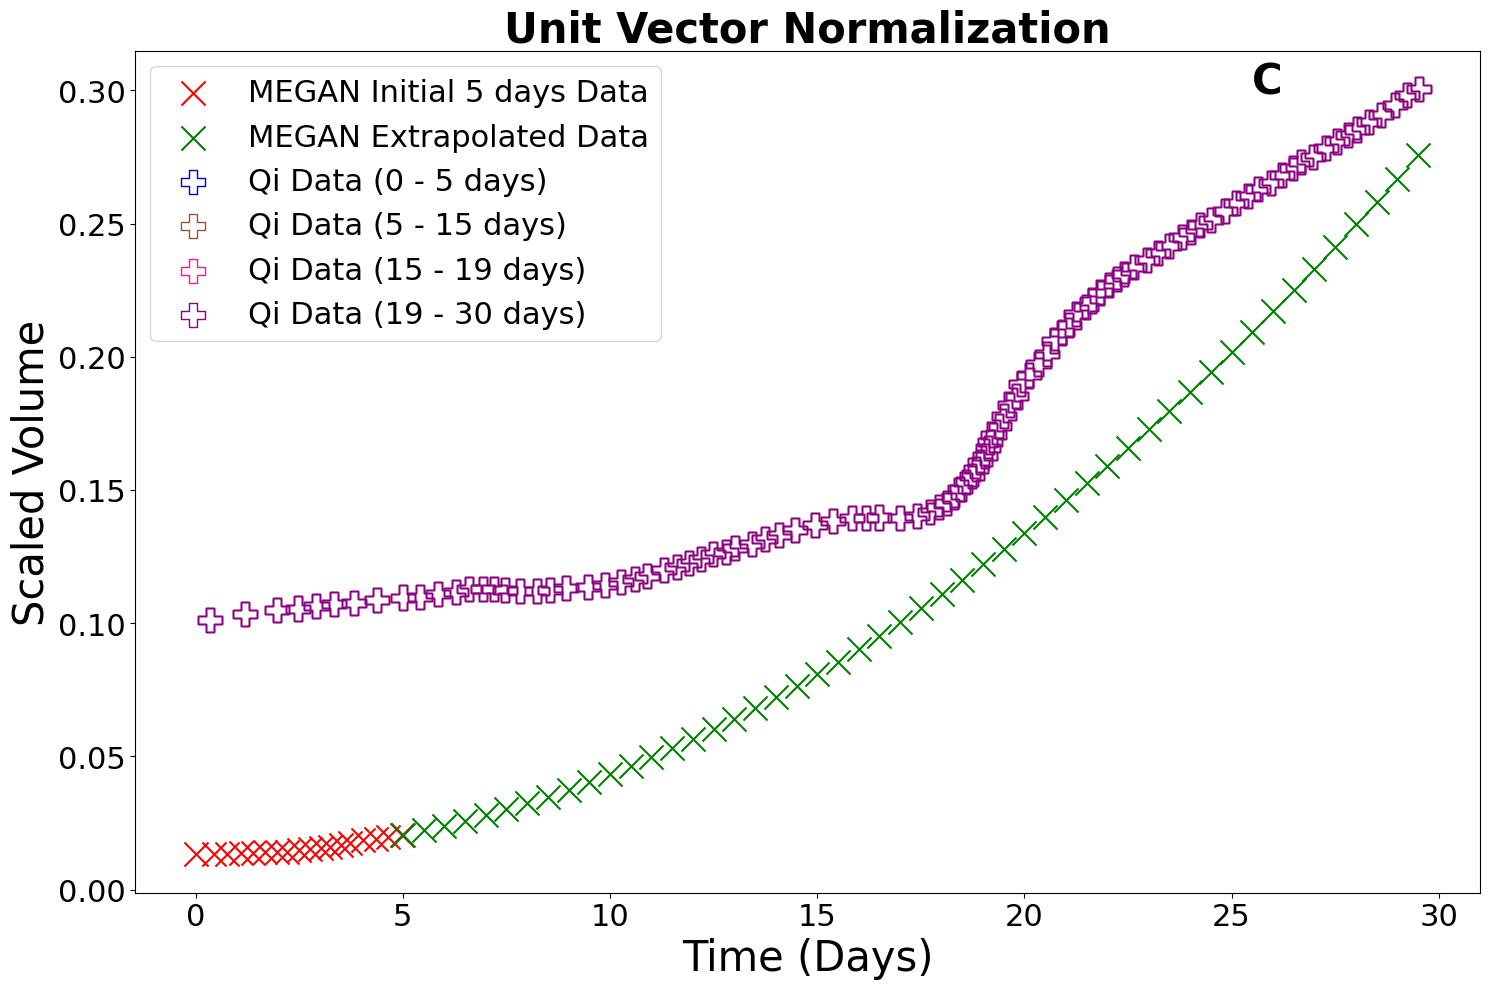

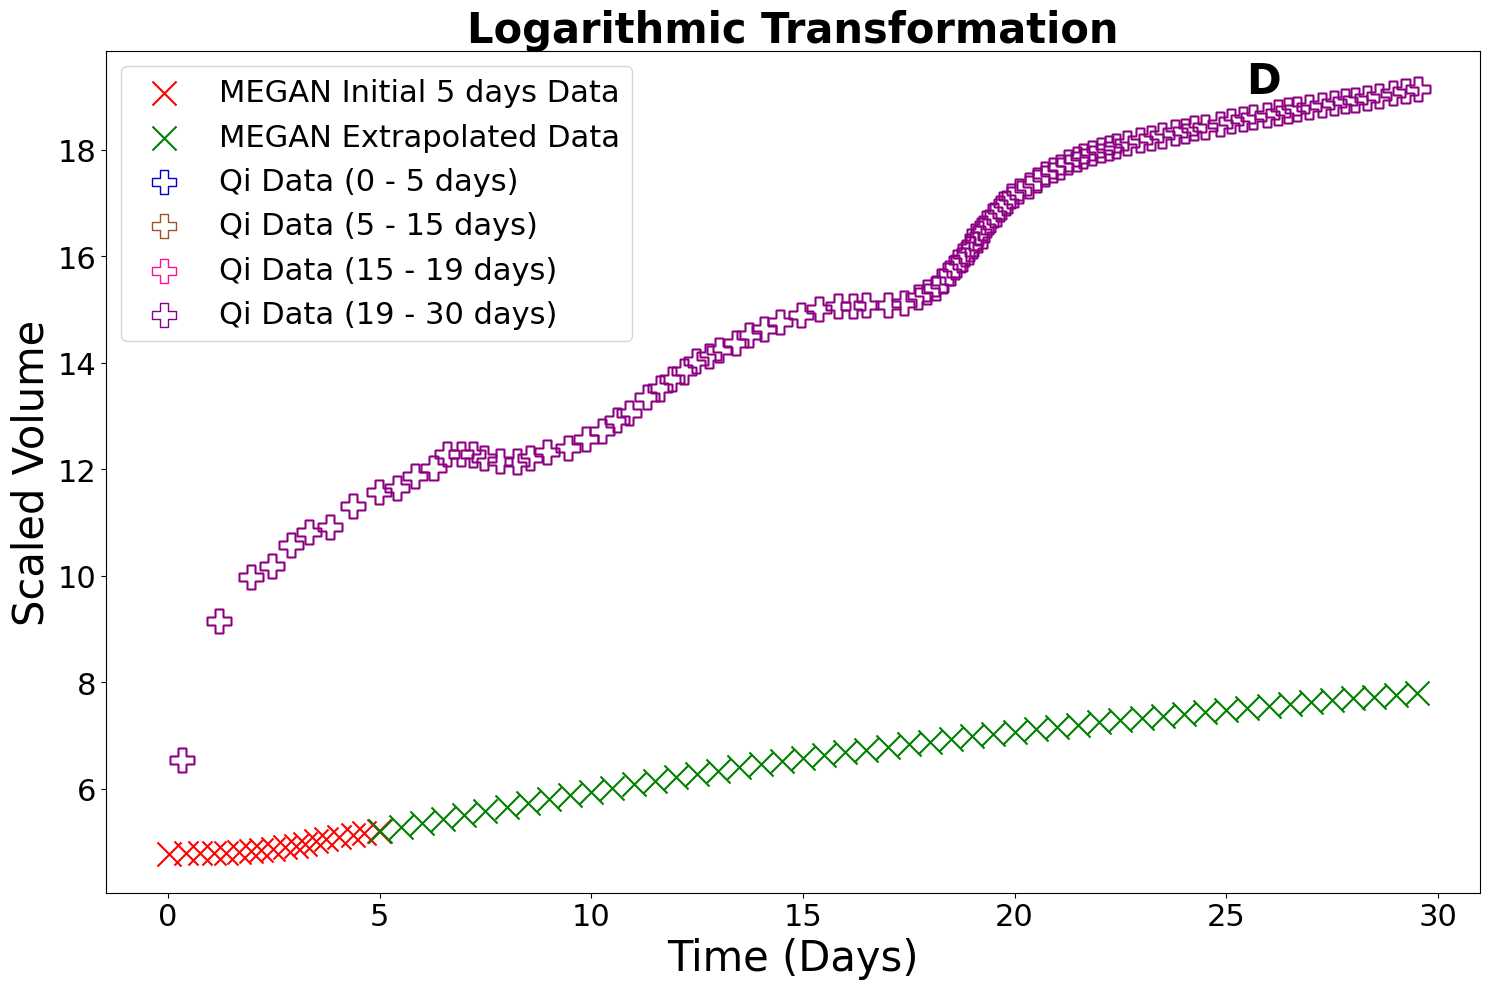

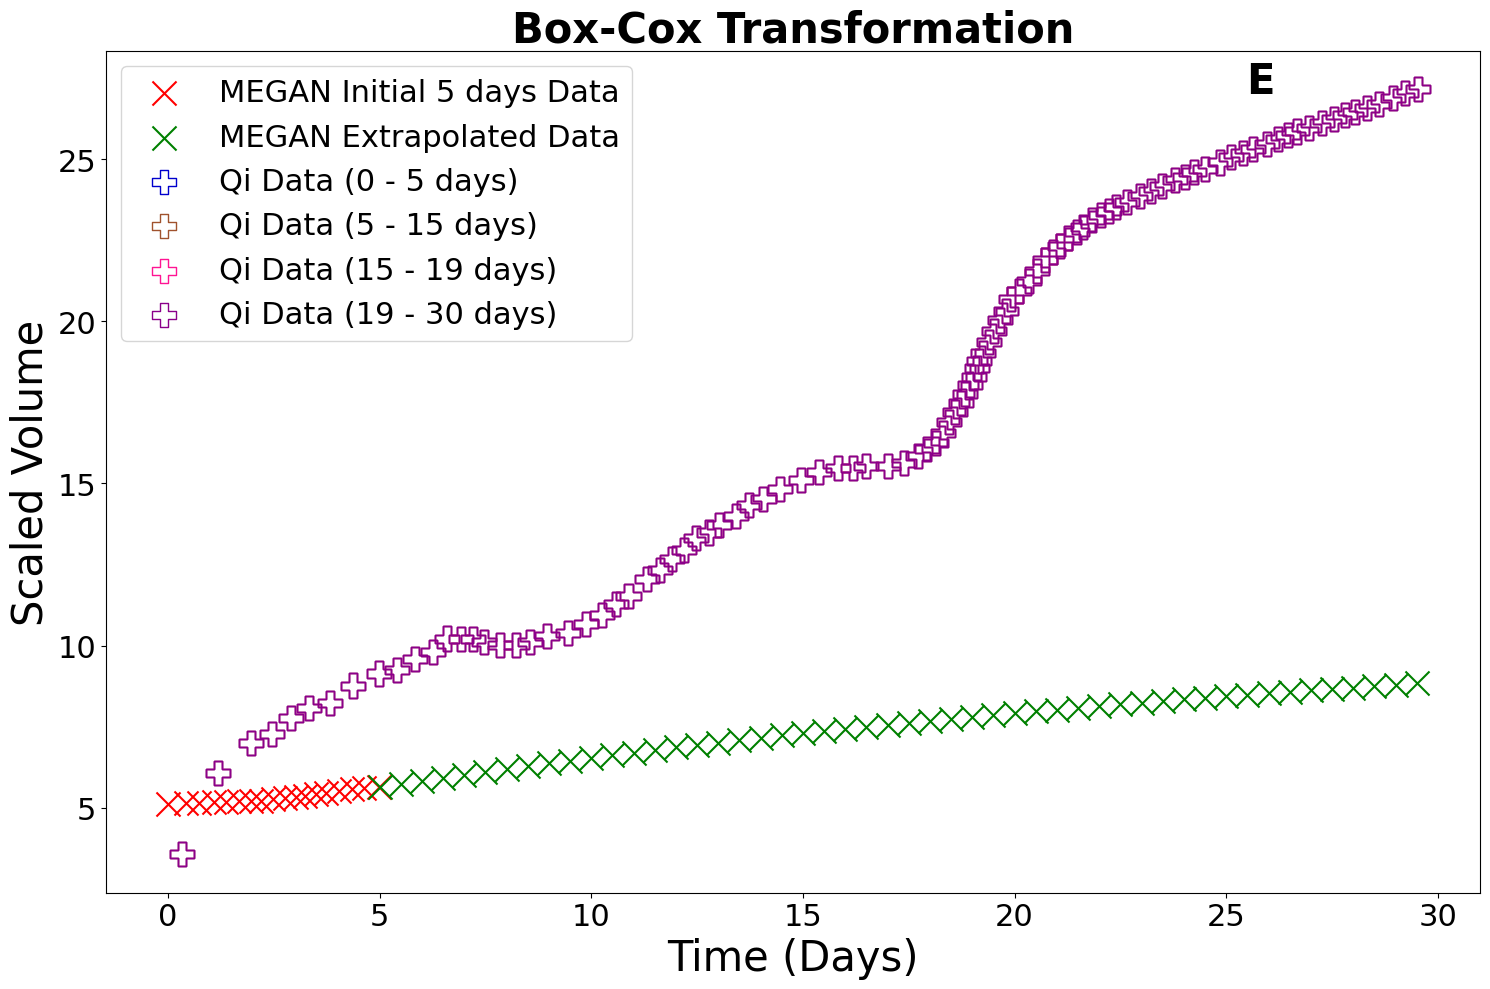

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from scipy.stats import boxcox
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR

# Load datasets
df = pd.read_csv('/Users/pracyaim/Downloads/Saline19.csv')
df_Q = pd.read_csv('/Users/pracyaim/Downloads/Qi100.csv')

df_Q.columns = ['Time', 'Volume']
df.columns = ['Time', 'Volume']

# Define transformations
def unit_vector_normalization(data):
    return data / np.linalg.norm(data)

def logarithmic_transformation(data):
    return np.log1p(data)  # log(1 + x) to avoid log(0)

def boxcox_transformation(data):
    return boxcox(data + 1e-6)[0]  # Box-Cox requires positive values

# Define scalers and custom transformations
scalers = {
    'Min-Max': MinMaxScaler(),
    'Mean Standardization': StandardScaler(),
    'Unit Vector Normalization': unit_vector_normalization,
    'Logarithmic Transformation': logarithmic_transformation,
    'Box-Cox Transformation': boxcox_transformation
}

# Train-test split for the original dataset
X_train, X_test, y_train, y_test = train_test_split(df['Time'].values.reshape(-1, 1), df['Volume'], test_size=0.2, random_state=42)

# Train the model on the first dataset
model = SVR(kernel='poly', degree=2)  # Using SVR with a polynomial kernel of degree 2
model.fit(X_train, y_train)

# Create a new DataFrame df_new with 'Time' from 5 to 29.5 days
time_values = np.linspace(5, 29.5, 50)
df_new = pd.DataFrame({'Time': time_values})

# Predict using the trained model on the new data
predictions_new = model.predict(df_new['Time'].values.reshape(-1, 1))

# Add predictions to the new DataFrame
df_new['Volume'] = predictions_new

# Combine df and df_new
df_combined = pd.concat([df, df_new])
df_combined_unscaled = df_combined.copy()

# Define segments for df_Q
segments = {
    '0 - 5 days': (0, 30),
    '5 - 15 days': (0, 30),
    '15 - 19 days': (0, 30),
    '19 - 30 days': (0, 30)
}

# Extract data for each segment
df_Q_segments = {key: df_Q[(df_Q['Time'] > start) & (df_Q['Time'] <= end)].copy() for key, (start, end) in segments.items()}

# Define shifting and scaling factors for each scaler
shifting_scaling_factors = {
    'Min-Max': (0.03, 1.2),
    'Mean Standardization': (0.33, 1.15),
    'Unit Vector Normalization': (0.1, 1),
    'Logarithmic Transformation': (0.1, 2.5),
    'Box-Cox Transformation': (0.2, 0.9)
}

# Plotting Min-Max, Mean Standardization, Unit Vector, Logarithmic, Box-Cox
for i, (scaler_name, scaler) in enumerate(scalers.items()):
    df_combined_scaled = df_combined.copy()

    # Apply transformation based on scaler type
    if scaler_name in ['Min-Max', 'Mean Standardization']:
        # Use the predefined sklearn scalers
        df_combined_scaled['Volume'] = scaler.fit_transform(df_combined[['Volume']].values.reshape(-1, 1)).flatten()
    elif scaler_name == 'Unit Vector Normalization':
        df_combined_scaled['Volume'] = unit_vector_normalization(df_combined['Volume'].values)
    elif scaler_name == 'Logarithmic Transformation':
        df_combined_scaled['Volume'] = logarithmic_transformation(df_combined['Volume'].values)
    elif scaler_name == 'Box-Cox Transformation':
        df_combined_scaled['Volume'] = boxcox_transformation(df_combined['Volume'].values)

    # Scale the 'Volume' for each segment of df_Q
    scaled_df_Q_segments = {}
    for key, segment in df_Q_segments.items():
        scaled_segment = segment.copy()
        if scaler_name in ['Min-Max', 'Mean Standardization']:
            scaled_segment['Volume'] = scaler.transform(segment[['Volume']].values.reshape(-1, 1)).flatten()
        elif scaler_name == 'Unit Vector Normalization':
            scaled_segment['Volume'] = unit_vector_normalization(segment['Volume'].values)
        elif scaler_name == 'Logarithmic Transformation':
            scaled_segment['Volume'] = logarithmic_transformation(segment['Volume'].values)
        elif scaler_name == 'Box-Cox Transformation':
            scaled_segment['Volume'] = boxcox_transformation(segment['Volume'].values)

        scaled_df_Q_segments[key] = scaled_segment

    # Apply shifting and scaling factors to Qi data
    shifting_factor, scaling_factor = shifting_scaling_factors[scaler_name]
    for key in scaled_df_Q_segments:
        scaled_df_Q_segments[key]['Volume'] = scaled_df_Q_segments[key]['Volume'] * scaling_factor + shifting_factor

    # Plotting
    plt.figure(figsize=(15, 10))

    # Scatter plot for Land's original data
    plt.scatter(df['Time'], df_combined_scaled.iloc[:len(df), -1], color='red', marker='x', s=300, label='MEGAN Initial 5 days Data')

    # Scatter plot for Land's extrapolated data
    plt.scatter(df_new['Time'], df_combined_scaled.iloc[len(df):, -1], color='green', marker='x', s=300, label='MEGAN Extrapolated Data')

    # Scatter plot for each segment of Qi data with different colors
    colors = ['mediumblue', 'sienna', 'deeppink', 'darkmagenta']
    for (key, segment), color in zip(scaled_df_Q_segments.items(), colors):
        X_segment = segment['Time'].values
        y_segment = segment['Volume'].values
        plt.scatter(X_segment, y_segment, color=color, marker='P', linestyle='None', facecolors='None', s=300, label=f'Qi Data ({key})')

    # Set plot labels and title
    plt.xlabel('Time (Days)', fontsize=30)
    plt.ylabel('Scaled Volume', fontsize=30)
    plt.title(scaler_name, fontsize=30, fontweight='bold')
    plt.legend(loc='upper left', fontsize=22)
    plt.text(0.83, 0.95, chr(65 + i), transform=plt.gca().transAxes, size=30, fontweight='bold')
    plt.xticks(fontsize=22)
    plt.yticks(fontsize=22)
    
    plt.tight_layout()

    # Show plot
    plt.show()

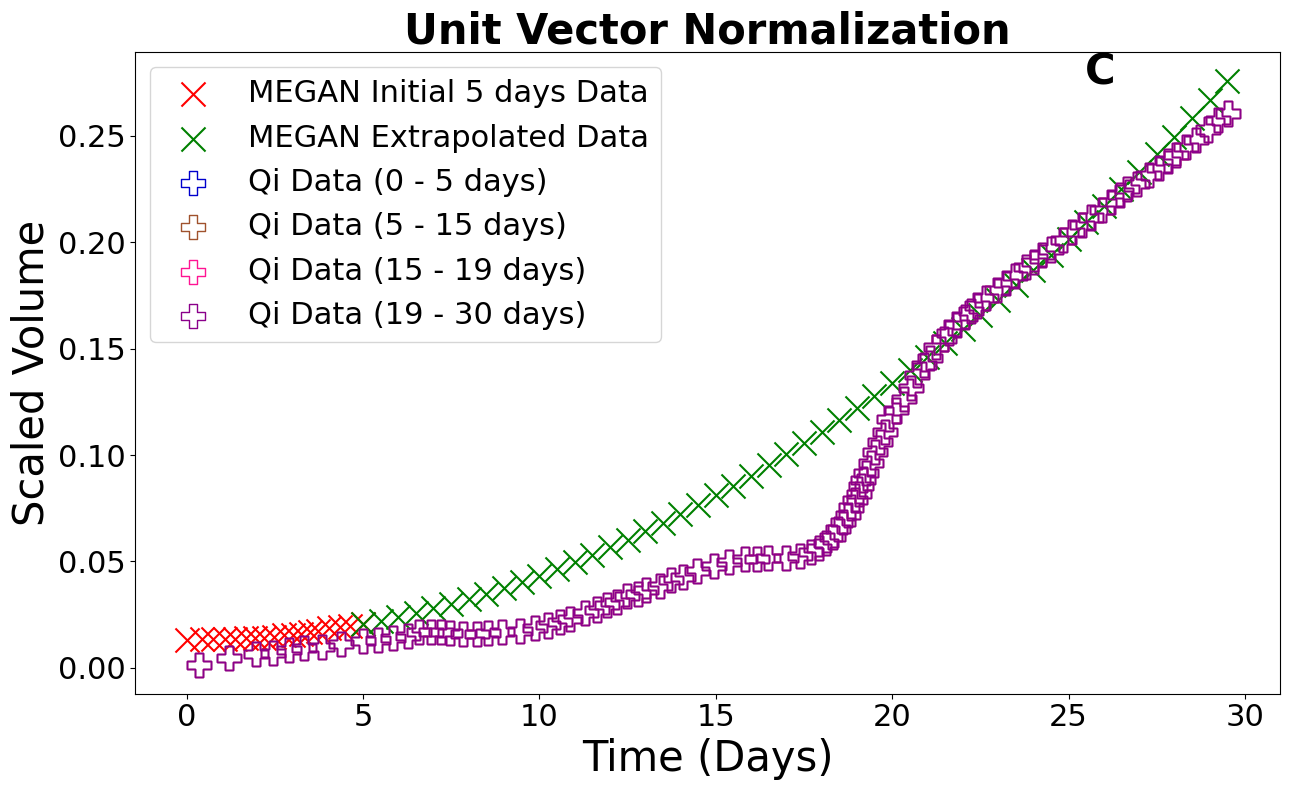

In [16]:
# Define Unit Vector Normalization function
def unit_vector_normalization(data):
    return data / np.linalg.norm(data)

# Apply Unit Vector Normalization
df_combined_scaled = df_combined.copy()
df_combined_scaled['Volume'] = unit_vector_normalization(df_combined['Volume'].values)

scaled_df_Q_segments = {}
for key, segment in df_Q_segments.items():
    scaled_segment = segment.copy()
    scaled_segment['Volume'] = unit_vector_normalization(segment['Volume'].values)
    scaled_df_Q_segments[key] = scaled_segment

# Apply shifting and scaling factors
shifting_factor, scaling_factor = 0, 1.3
for key in scaled_df_Q_segments:
    scaled_df_Q_segments[key]['Volume'] = scaled_df_Q_segments[key]['Volume'] * scaling_factor + shifting_factor

# Plotting
plt.figure(figsize=(13, 8))

# Scatter plot for Land's original data
plt.scatter(df['Time'], df_combined_scaled.iloc[:len(df), -1], color='red', marker='x', s=300, label='MEGAN Initial 5 days Data')

# Scatter plot for Land's extrapolated data
plt.scatter(df_new['Time'], df_combined_scaled.iloc[len(df):, -1], color='green', marker='x', s=300, label='MEGAN Extrapolated Data')

# Scatter plot for each segment of Qi data with different colors
colors = ['mediumblue', 'sienna', 'deeppink', 'darkmagenta']
for (key, segment), color in zip(scaled_df_Q_segments.items(), colors):
    X_segment = segment['Time'].values
    y_segment = segment['Volume'].values
    plt.scatter(X_segment, y_segment, color=color, marker='P', linestyle='None', facecolors='None', s=300, label=f'Qi Data ({key})')

# Set plot labels and title
plt.xlabel('Time (Days)', fontsize=30)
plt.ylabel('Scaled Volume', fontsize=30)
plt.title('Unit Vector Normalization', fontsize=30, fontweight='bold')
plt.legend(loc='upper left', fontsize=22)
plt.text(0.83, 0.95, 'C', transform=plt.gca().transAxes, size=30, fontweight='bold')
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)

plt.tight_layout()
plt.show()

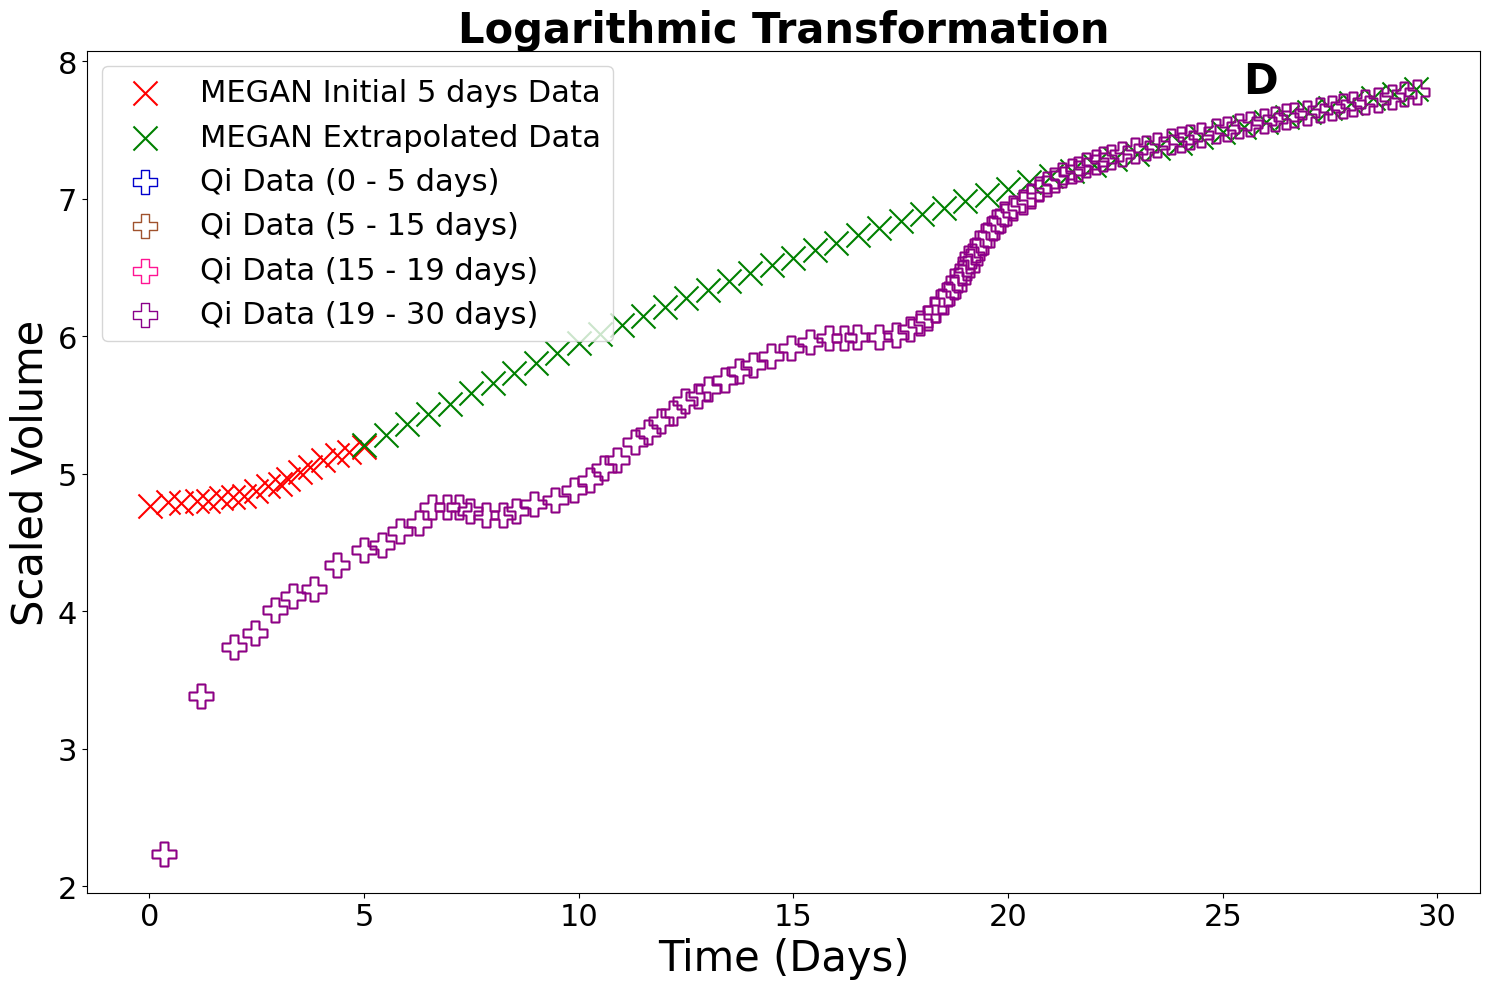

In [17]:
# Define Logarithmic Transformation function
def logarithmic_transformation(data):
    return np.log1p(data)  # log(1 + x) to avoid log(0)

# Apply Logarithmic Transformation
df_combined_scaled = df_combined.copy()
df_combined_scaled['Volume'] = logarithmic_transformation(df_combined['Volume'].values)

scaled_df_Q_segments = {}
for key, segment in df_Q_segments.items():
    scaled_segment = segment.copy()
    scaled_segment['Volume'] = logarithmic_transformation(segment['Volume'].values)
    scaled_df_Q_segments[key] = scaled_segment

# Apply shifting and scaling factors
shifting_factor, scaling_factor = -0.6, 1.1
for key in scaled_df_Q_segments:
    scaled_df_Q_segments[key]['Volume'] = scaled_df_Q_segments[key]['Volume'] * scaling_factor + shifting_factor

# Plotting
plt.figure(figsize=(15, 10))

# Scatter plot for Land's original data
plt.scatter(df['Time'], df_combined_scaled.iloc[:len(df), -1], color='red', marker='x', s=300, label='MEGAN Initial 5 days Data')

# Scatter plot for Land's extrapolated data
plt.scatter(df_new['Time'], df_combined_scaled.iloc[len(df):, -1], color='green', marker='x', s=300, label='MEGAN Extrapolated Data')

# Scatter plot for each segment of Qi data with different colors
colors = ['mediumblue', 'sienna', 'deeppink', 'darkmagenta']
for (key, segment), color in zip(scaled_df_Q_segments.items(), colors):
    X_segment = segment['Time'].values
    y_segment = segment['Volume'].values
    plt.scatter(X_segment, y_segment, color=color, marker='P', linestyle='None', facecolors='None', s=300, label=f'Qi Data ({key})')

# Set plot labels and title
plt.xlabel('Time (Days)', fontsize=30)
plt.ylabel('Scaled Volume', fontsize=30)
plt.title('Logarithmic Transformation', fontsize=30, fontweight='bold')
plt.legend(loc='upper left', fontsize=22)
plt.text(0.83, 0.95, 'D', transform=plt.gca().transAxes, size=30, fontweight='bold')
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)

plt.tight_layout()
plt.show()

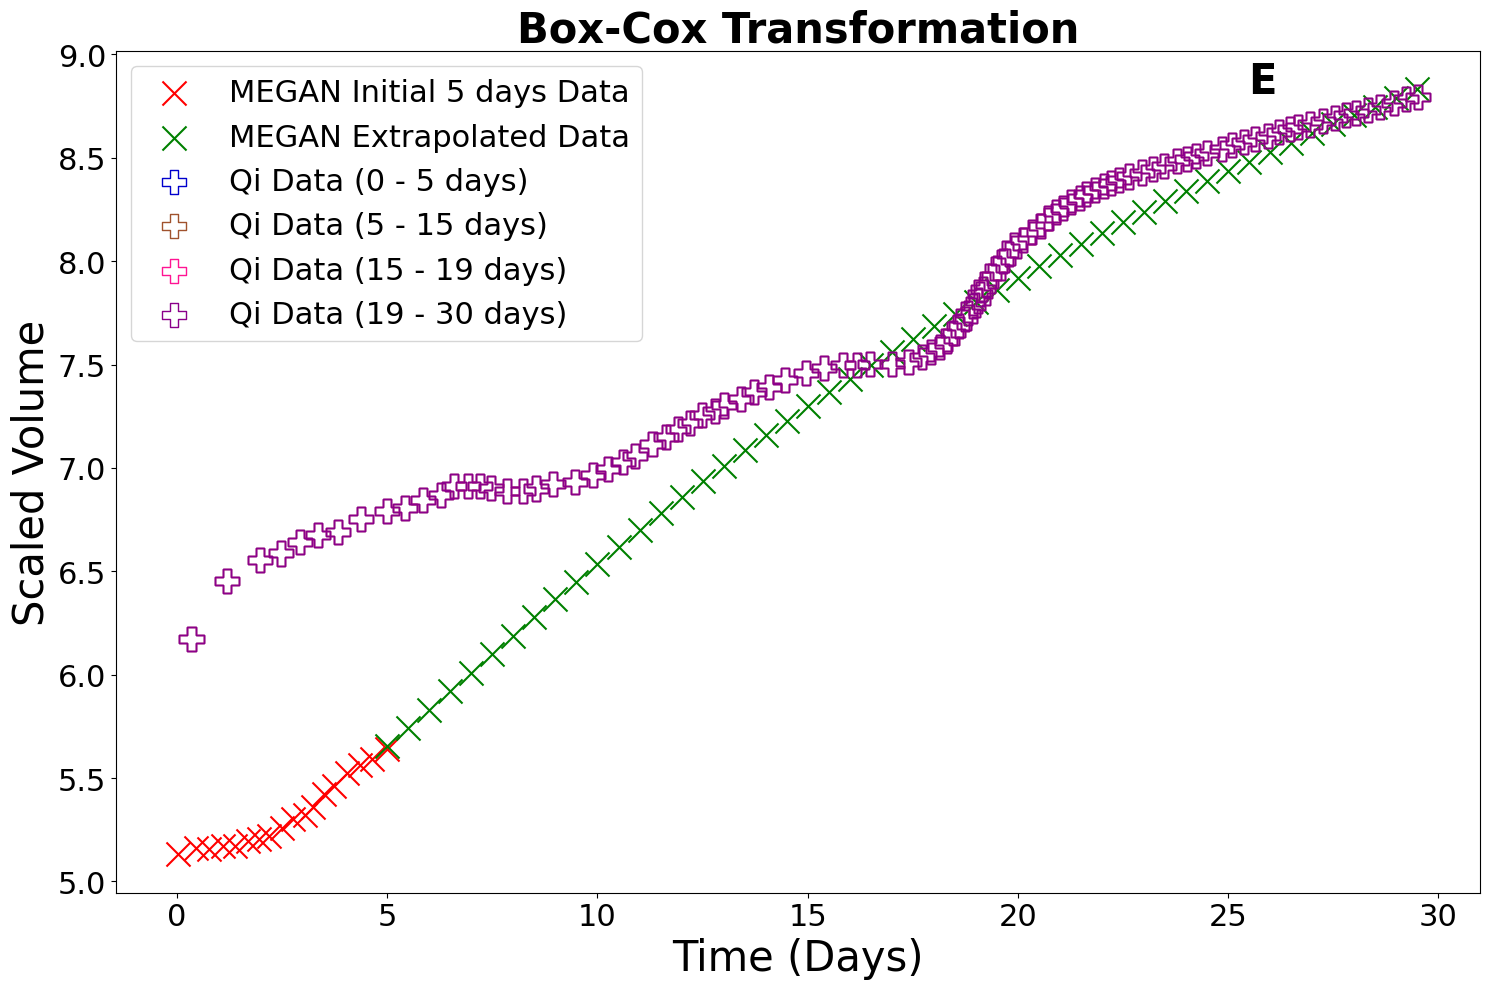

In [18]:
from scipy.stats import boxcox

# Define Box-Cox Transformation function
def boxcox_transformation(data):
    return boxcox(data + 1e-6)[0]  # Box-Cox requires positive values

# Apply Box-Cox Transformation
df_combined_scaled = df_combined.copy()
df_combined_scaled['Volume'] = boxcox_transformation(df_combined['Volume'].values)

scaled_df_Q_segments = {}
for key, segment in df_Q_segments.items():
    scaled_segment = segment.copy()
    scaled_segment['Volume'] = boxcox_transformation(segment['Volume'].values)
    scaled_df_Q_segments[key] = scaled_segment

# Apply shifting and scaling factors
shifting_factor, scaling_factor = 5.8, 0.1
for key in scaled_df_Q_segments:
    scaled_df_Q_segments[key]['Volume'] = scaled_df_Q_segments[key]['Volume'] * scaling_factor + shifting_factor

# Plotting
plt.figure(figsize=(15, 10))

# Scatter plot for Land's original data
plt.scatter(df['Time'], df_combined_scaled.iloc[:len(df), -1], color='red', marker='x', s=300, label='MEGAN Initial 5 days Data')

# Scatter plot for Land's extrapolated data
plt.scatter(df_new['Time'], df_combined_scaled.iloc[len(df):, -1], color='green', marker='x', s=300, label='MEGAN Extrapolated Data')

# Scatter plot for each segment of Qi data with different colors
colors = ['mediumblue', 'sienna', 'deeppink', 'darkmagenta']
for (key, segment), color in zip(scaled_df_Q_segments.items(), colors):
    X_segment = segment['Time'].values
    y_segment = segment['Volume'].values
    plt.scatter(X_segment, y_segment, color=color, marker='P', linestyle='None', facecolors='None', s=300, label=f'Qi Data ({key})')

# Set plot labels and title
plt.xlabel('Time (Days)', fontsize=30)
plt.ylabel('Scaled Volume', fontsize=30)
plt.title('Box-Cox Transformation', fontsize=30, fontweight='bold')
plt.legend(loc='upper left', fontsize=22)
plt.text(0.83, 0.95, 'E', transform=plt.gca().transAxes, size=30, fontweight='bold')
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)

plt.tight_layout()
plt.show()

### 3.(c,d)

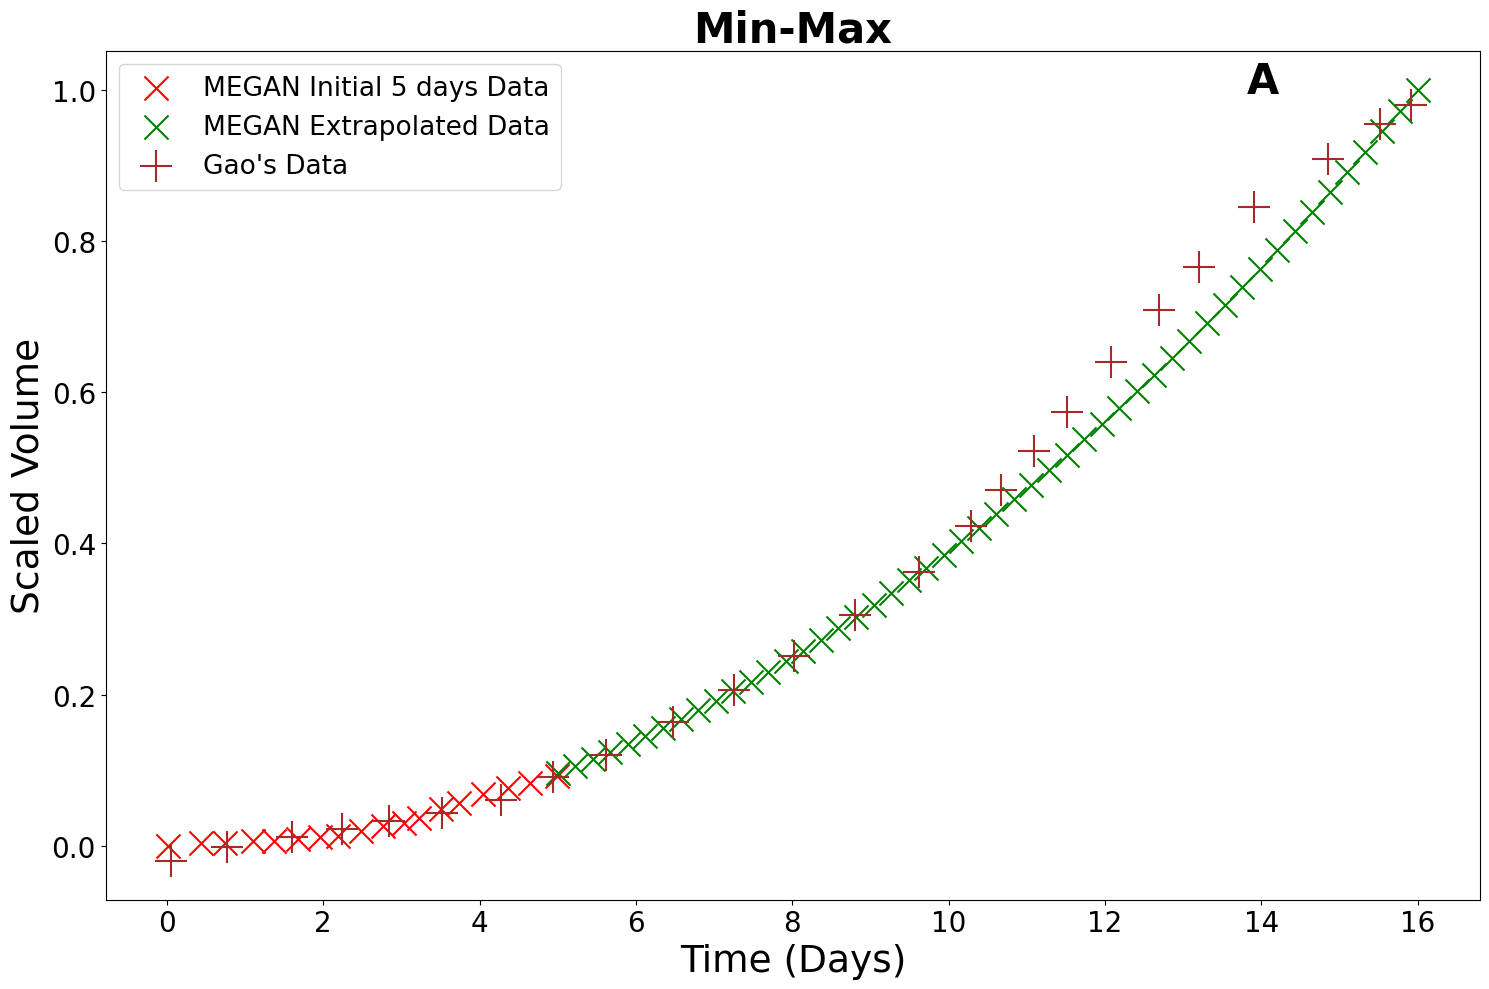

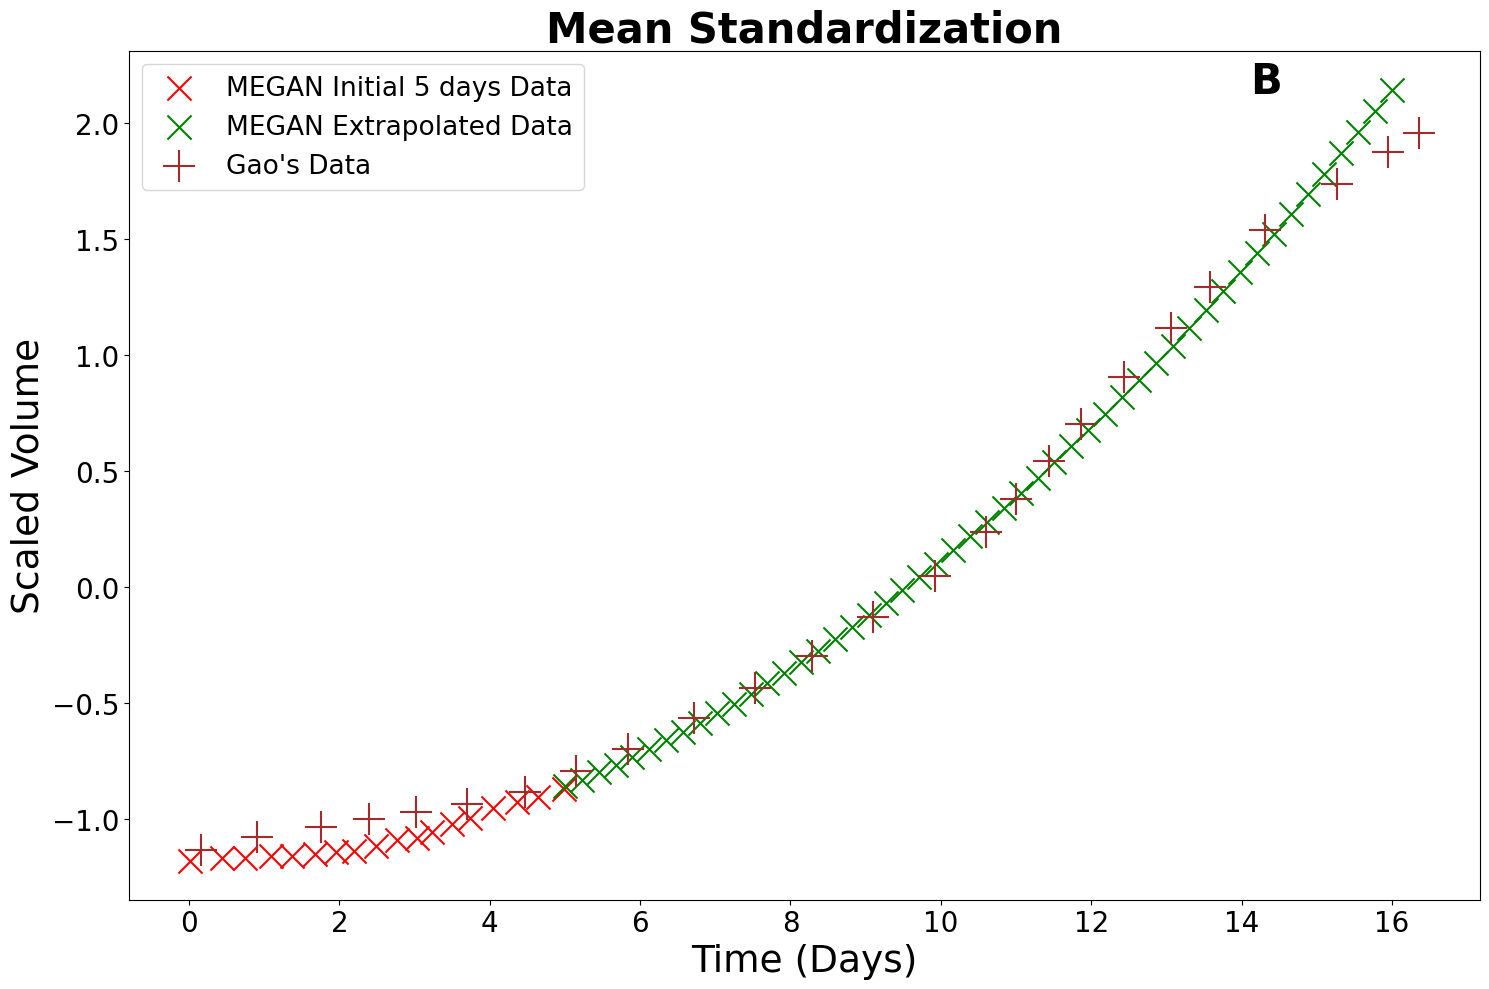

In [19]:

# Used datasets
df = pd.read_csv('/Users/pracyaim/Downloads/Saline19.csv')
Saline_gao = pd.read_csv('/Users/pracyaim/Downloads/salinegao.csv')


Saline_gao.columns = ['Time', 'Volume']
df.columns = ['Time', 'Volume']

# Scalers
scalers = {
    'Min-Max': MinMaxScaler(),
    'Mean Standardization': StandardScaler()
}

# Train-test split for the original dataset
X_train, X_test, y_train, y_test = train_test_split(df['Time'].values.reshape(-1, 1), df['Volume'], test_size=0.2, random_state=42)

# Train the model on the first dataset
model = SVR(kernel='poly', degree=2)  # Using SVR with a polynomial kernel of degree 2
model.fit(X_train, y_train)

# Create a new DataFrame df_new with 'Time' from 5 to 30 days
time_values = np.linspace(5, 16, 50)
df_new = pd.DataFrame({'Time': time_values})

# Predict using the trained model on the new data
predictions_new = model.predict(df_new['Time'].values.reshape(-1, 1))

# Add predictions to the new DataFrame
df_new['Volume'] = predictions_new

# Combine df and df_new
df_combined = pd.concat([df, df_new])

# Define shifting and scaling factors for each scaler
shifting_scaling_factors = {
    'Min-Max': (-0.02, 1),
    'Mean Standardization': (0.095,1.02)
}

# Plotting each scaler separately
for i, (scaler_name, scaler) in enumerate(scalers.items()):
    
    df_combined_scaled = df_combined.copy()
    df_combined_scaled['Volume'] = scaler.fit_transform(df_combined[['Volume']])
    Saline_gao_scaled = Saline_gao.copy()
    Saline_gao_scaled['Volume'] = scaler.fit_transform(Saline_gao[['Volume']])

    # Apply shifting and scaling factors to Gao data
    shifting_factor, scaling_factor = shifting_scaling_factors[scaler_name]
    Saline_gao_scaled['Volume'] = Saline_gao_scaled['Volume'] * scaling_factor + shifting_factor
    Saline_gao_scaled['Time'] = Saline_gao_scaled['Time'] * scaling_factor + shifting_factor
    
    # Extract data for plotting
    X_combined = df_combined['Time'].values
    y_combined = df_combined_scaled['Volume'].values

    X_G = Saline_gao_scaled['Time'].values
    y_G = Saline_gao_scaled['Volume'].values

    # Plotting
    plt.figure(figsize=(15, 10))

    # Creating scatter plot for Land,et al's initial and extrapolated data overlaid on Gao's data
    plt.scatter(df['Time'], df_combined_scaled.iloc[:len(df), -1], color='red', marker='x', s=300, label='MEGAN Initial 5 days Data')

    plt.scatter(df_new['Time'], df_combined_scaled.iloc[len(df):, -1], color='green', marker='x', s=300, label='MEGAN Extrapolated Data')

    plt.scatter(X_G, y_G,  color='brown',marker='+', s=500, label=f"Gao's Data ")

    # Set plot labels and title
    plt.xlabel('Time (Days)', fontsize=27)
    plt.ylabel('Scaled Volume', fontsize=27)
    plt.title(scaler_name, fontsize=30, fontweight='bold')
    plt.legend(loc='upper left', fontsize=19)
    plt.text(0.83, 0.95, chr(65 + i), transform=plt.gca().transAxes, size=30, fontweight='bold')
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.tight_layout()

    # Show plot
    plt.show()




# 4

### 4.(a,b,c,d)

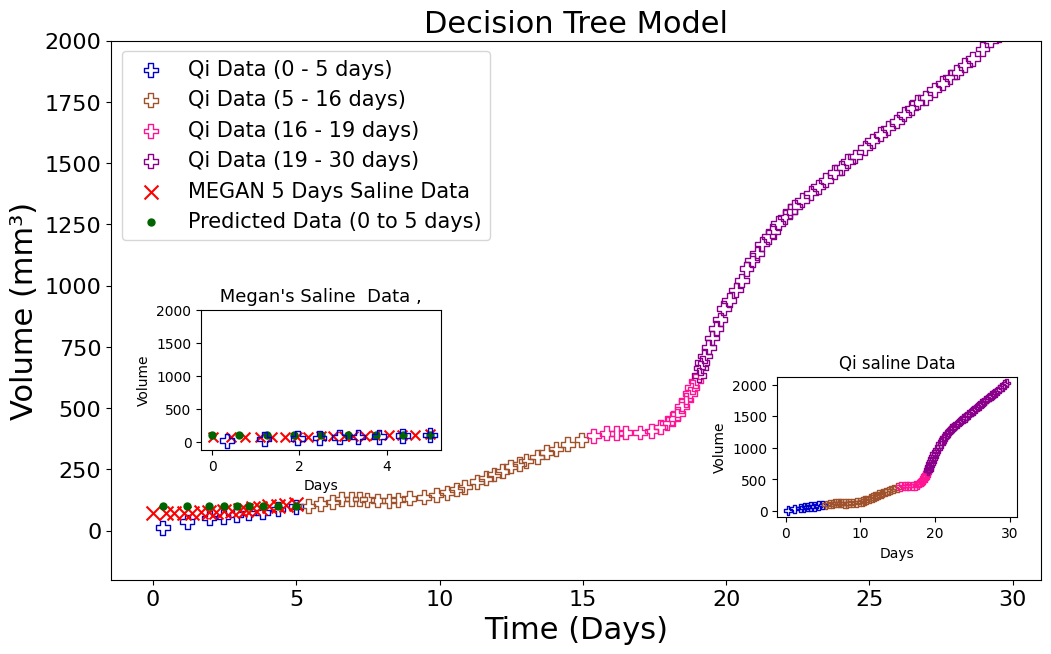

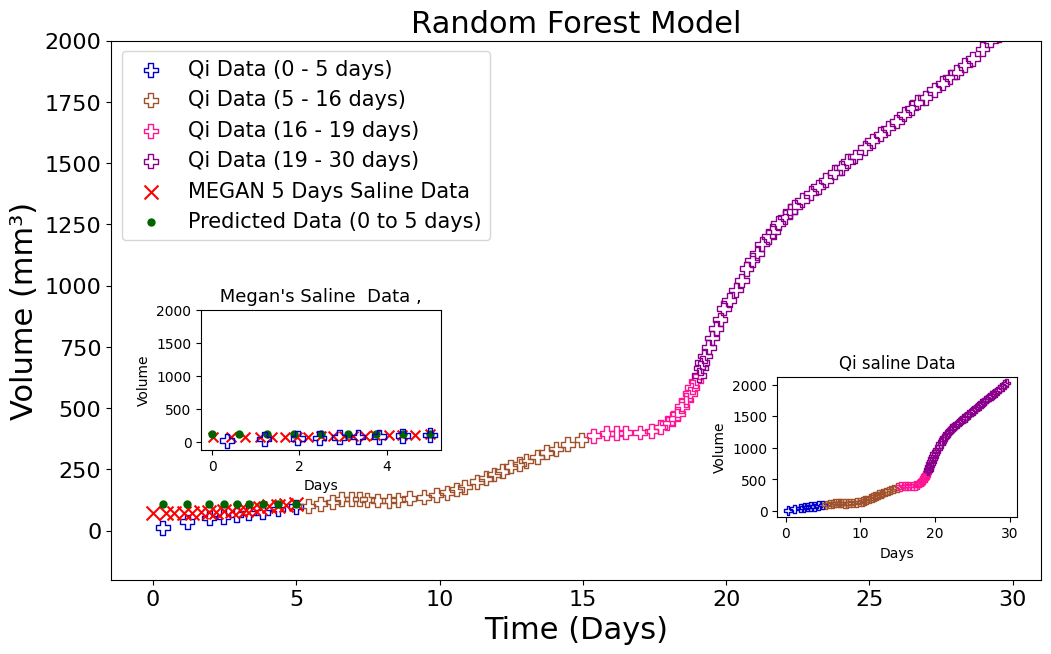

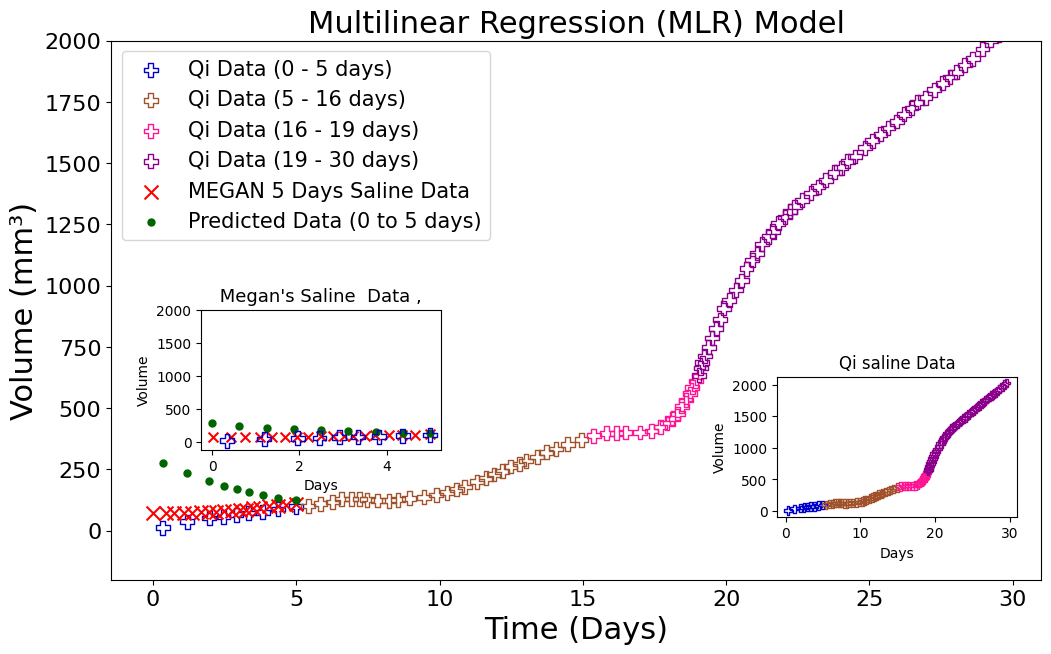

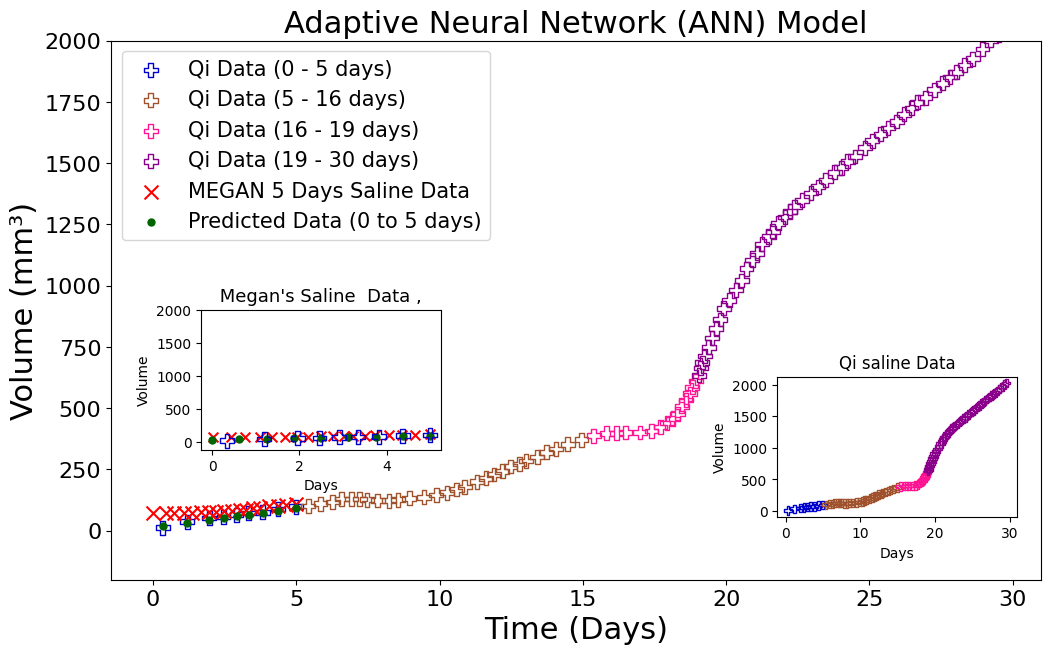

In [20]:
# Used datasets

#Saline_Qi = pd.read_csv('/Users/pracyaim/Downloads/Saline638Qi.csv')
#Saline_Land = pd.read_csv('/Users/pracyaim/Downloads/saline700.csv')
Saline_Qi = pd.read_csv('/Users/pracyaim/Downloads/QI100.csv')
Saline_Land = pd.read_csv('/Users/pracyaim/Downloads/saline19.csv')
Saline_Land.columns = ['Time','Volume']
Saline_Qi.columns = ['Time','Volume']


# The adaptive neural network model
adaptive_ann = MLPRegressor(hidden_layer_sizes=(20, 10), activation='relu',
                            max_iter=5000, learning_rate='adaptive', 
                            early_stopping=True, n_iter_no_change=50, 
                            random_state=42)


# Splitting the data into sets for different time ranges
df_Q1 = Saline_Qi[(Saline_Qi['Time'] > 5) & (Saline_Qi['Time'] <= 15)]
df_Q2 = Saline_Qi[(Saline_Qi['Time'] > 15) & (Saline_Qi['Time'] <= 19)]
df_Q3 = Saline_Qi[(Saline_Qi['Time'] > 19) & (Saline_Qi['Time'] <= 30)]
df_Q4 = Saline_Qi[(Saline_Qi['Time'] > 0) & (Saline_Qi['Time'] <= 5)]

X1_train, y1_train = df_Q1['Time'].values.reshape(-1, 1), df_Q1['Volume']
X2_train, y2_train = df_Q2['Time'].values.reshape(-1, 1), df_Q2['Volume']
X3_train, y3_train = df_Q3['Time'].values.reshape(-1, 1), df_Q3['Volume']
X4_train, y4_train = df_Q4['Time'].values.reshape(-1, 1), df_Q4['Volume']

# Define the polynomial regression pipeline
polynomial_regression = Pipeline([
    ('poly', PolynomialFeatures(degree=3)),
    ('linear', LinearRegression())
])

# Update the models dictionary
models = {
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=70, max_depth=7,min_samples_split=3, random_state=42),
    "Multilinear Regression (MLR)": polynomial_regression,
    "Adaptive Neural Network (ANN)": adaptive_ann
}

# Function to create individual plots
def create_plot(model_name, model):
    plt.figure(figsize=(12, 7))
    
    # Train the model
    model.fit(X1_train, y1_train)
    
    # Create a new DataFrame with 'Time' from 0 to 5 days
    time_values = np.linspace(0, 5, 9)
    df_new = pd.DataFrame({'Time': time_values})
    
    # Predict using the trained model on the new data
    predictions_new = model.predict(X4_train)
    
    # Add predictions to the new DataFrame
    df_new['Predicted_Volume'] = predictions_new
    
    # Plotting the first 5 days' predictions of Qi et al's Saline data against Land et al's Saline data
    plt.scatter(X4_train, y4_train, color='mediumblue',   marker='P', linestyle='None', facecolors='None', s=100, label='Qi Data (0 - 5 days)')
    plt.scatter(X1_train, y1_train, color='sienna' ,  marker='P', linestyle='None', facecolors='None', s=100, label='Qi Data (5 - 16 days)')
    plt.scatter(X2_train, y2_train, color='deeppink',   marker='P', linestyle='None', facecolors='None', s=100, label='Qi Data (16 - 19 days)')
    plt.scatter(X3_train, y3_train, color='darkmagenta',  marker='P', linestyle='None', facecolors='None', s=100, label='Qi Data (19 - 30 days)')
    plt.scatter(Saline_Land['Time'], Saline_Land['Volume'] * 0.605, color='red', marker='x', s=100, label='MEGAN 5 Days Saline Data')
    plt.scatter(X4_train,predictions_new, color='darkgreen', marker='.', s=100, label='Predicted Data (0 to 5 days)')
  
    plt.xlabel('Time (Days)', fontsize=22)
    plt.ylabel('Volume (mm³)', fontsize=22)
    plt.title(f"{model_name} Model",fontsize=22 )
    plt.xticks(fontsize=16 )
    plt.yticks(fontsize=16)
    plt.legend(loc='upper left', fontsize= 15)
    plt.ylim(-200.5, 2000)

   
    # Land's saline Inset
    ax_inset1 = plt.axes([0.2, 0.296, 0.2, 0.2])
    ax_inset1.scatter(df['Time'], df['Volume']*0.605, color='red', marker='x', s=50)
    ax_inset1.scatter(df_new['Time'], df_new['Predicted_Volume'], color='darkgreen', marker='.', s=100, label='Predicted Data (0 to 5 days)')
    ax_inset1.scatter(X4_train, y4_train, color='mediumblue',  marker='P', linestyle='None', facecolors='None', s=100, label='Qi Data (0 - 5 days)')
    ax_inset1.set_title(" Megan's Saline  Data , ", fontsize=13)
    ax_inset1.set_ylim(-120.5, 2000)
    ax_inset1.set_xlabel('Days', fontsize=10)
    ax_inset1.set_ylabel('Volume', fontsize=10)

    # Qi's saline Inset
    ax_inset2 = plt.axes([0.68, 0.2, 0.2, 0.2])
    ax_inset2.scatter(X4_train, y4_train, color='mediumblue',  marker='P', linestyle='None', facecolors='None',label='Qi Data (0 - 5 days)')
    ax_inset2.scatter(X1_train, y1_train, color='sienna',  marker='P', linestyle='None', facecolors='None', label='Qi Data (5 - 16 days)')
    ax_inset2.scatter(X2_train, y2_train, color='deeppink',  marker='P', linestyle='None', facecolors='None', label='Qi Data (16 - 19 days)')
    ax_inset2.scatter(X3_train, y3_train, color='darkmagenta', marker='P', linestyle='None', facecolors='None', label='Qi Data (19 - 30 days)')
    ax_inset2.set_title('Qi saline Data', fontsize=12)
    ax_inset2.set_xlabel('Days', fontsize=10)
    ax_inset2.set_ylabel('Volume', fontsize=10)

    plt.show()

# Create individual plots for each model
for model_name, model in models.items():
    create_plot(model_name, model)

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV

# Load datasets
Saline_Qi = pd.read_csv('/Users/pracyaim/Downloads/QI100.csv')
Saline_Land = pd.read_csv('/Users/pracyaim/Downloads/saline19.csv')
Saline_Land.columns = ['Time', 'Volume']
Saline_Qi.columns = ['Time', 'Volume']

# Splitting the data into sets for different time ranges
df_Q1 = Saline_Qi[(Saline_Qi['Time'] > 5) & (Saline_Qi['Time'] <= 15)]
df_Q2 = Saline_Qi[(Saline_Qi['Time'] > 15) & (Saline_Qi['Time'] <= 19)]
df_Q3 = Saline_Qi[(Saline_Qi['Time'] > 19) & (Saline_Qi['Time'] <= 30)]
df_Q4 = Saline_Qi[(Saline_Qi['Time'] > 0) & (Saline_Qi['Time'] <= 4)]

X1_train, y1_train = df_Q1['Time'].values.reshape(-1, 1), df_Q1['Volume']
X2_train, y2_train = df_Q2['Time'].values.reshape(-1, 1), df_Q2['Volume']
X3_train, y3_train = df_Q3['Time'].values.reshape(-1, 1), df_Q3['Volume']
X4_train, y4_train = df_Q4['Time'].values.reshape(-1, 1), df_Q4['Volume']

# Combine all training data for cross-validation
X_combined = np.concatenate((X1_train, X2_train, X3_train, X4_train))
y_combined = np.concatenate((y1_train, y2_train, y3_train, y4_train))

# Define the models and their hyperparameters for Grid Search
param_grids = {
    "Decision Tree": {
        "model": DecisionTreeRegressor(random_state=0),
        "param_grid": {
            "max_depth": [5, 10, 20, None],
            "min_samples_split": [2, 5, 10]
        }
    },
    "Random Forest": {
        "model": RandomForestRegressor(random_state=4),
        "param_grid": {
            "n_estimators": [23, 30, 70],
            "max_depth": [23, 50, 70],
            "min_samples_split": [3, 5, 10]
        }
    },
    "Multilinear Regression (MLR)": {
        "model": Pipeline([
            ('poly', PolynomialFeatures()),
            ('linear', LinearRegression())
        ]),
        "param_grid": {
            "poly__degree": [2, 3, 4, 5, 10]
        }
    },
    "Adaptive Neural Network (ANN)": {
        "model": MLPRegressor(max_iter=5000, early_stopping=True, random_state=4),
        "param_grid": {
            "hidden_layer_sizes": [(20, 10), (20, 20), (40, 30)],
            "n_iter_no_change":[5,50,500],
            "learning_rate": ['adaptive', 'constant', 'invscaling'],
            "early_stopping":[True],
        }
    }
}

# Perform GridSearchCV for each model
best_estimators = {}
cv_scores = {}

kf = KFold(n_splits=5, shuffle=True, random_state=4)

for model_name, model_info in param_grids.items():
    grid_search = GridSearchCV(estimator=model_info["model"], param_grid=model_info["param_grid"], 
                               scoring='r2', cv=kf, n_jobs=-1)
    grid_search.fit(X_combined, y_combined)

    print(f"{model_name} Best Hyperparameters: {grid_search.best_params_}")



Decision Tree Best Hyperparameters: {'max_depth': 10, 'min_samples_split': 2}
Random Forest Best Hyperparameters: {'max_depth': 23, 'min_samples_split': 3, 'n_estimators': 70}
Multilinear Regression (MLR) Best Hyperparameters: {'poly__degree': 10}
Adaptive Neural Network (ANN) Best Hyperparameters: {'early_stopping': True, 'hidden_layer_sizes': (20, 10), 'learning_rate': 'adaptive', 'n_iter_no_change': 500}


Decision Tree Cross-Validation R² Scores: [0.99610678 0.99416211 0.99452093 0.98463251 0.99559006]
Decision Tree Average R² Score: 0.9930024794586595

Random Forest Cross-Validation R² Scores: [0.9982139  0.99857254 0.99803395 0.9983101  0.9970557 ]
Random Forest Average R² Score: 0.9980372355358147

Multilinear Regression (MLR) Cross-Validation R² Scores: [0.98332698 0.99147751 0.98628866 0.98913946 0.98993697]
Multilinear Regression (MLR) Average R² Score: 0.9880339151561914

Adaptive Neural Network (ANN) Cross-Validation R² Scores: [0.72222455 0.68203794 0.65628235 0.7490254  0.74414485]
Adaptive Neural Network (ANN) Average R² Score: 0.7107430183712239



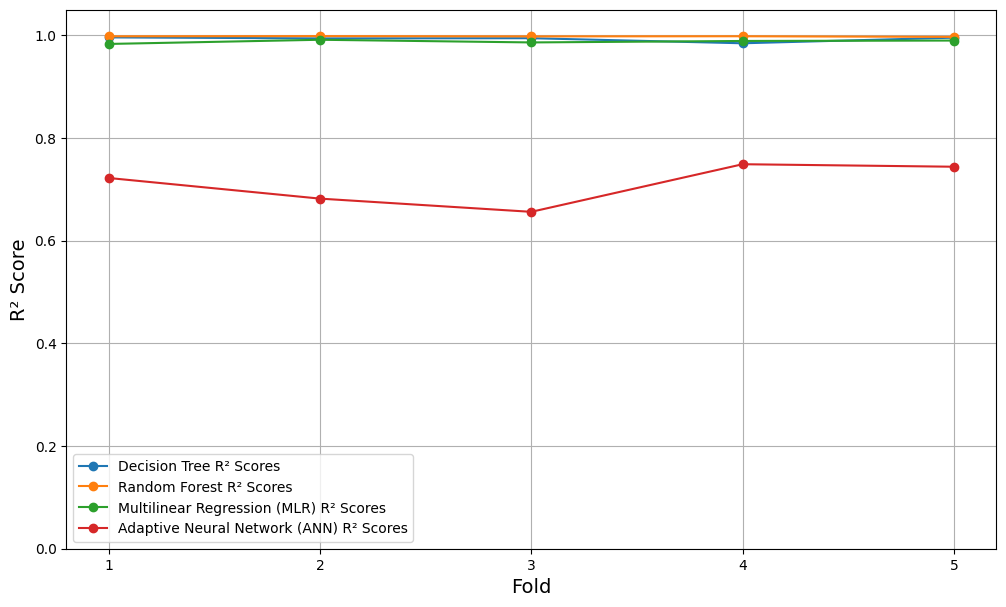

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

# Load datasets
Saline_Qi = pd.read_csv('/Users/pracyaim/Downloads/QI100.csv')
Saline_Land = pd.read_csv('/Users/pracyaim/Downloads/saline19.csv')
Saline_Land.columns = ['Time', 'Volume']
Saline_Qi.columns = ['Time', 'Volume']

# Define the adaptive neural network model
adaptive_ann = MLPRegressor(hidden_layer_sizes=(20, 10), activation='relu',
                            max_iter=5000, learning_rate='adaptive', 
                            early_stopping=True, n_iter_no_change=50, 
                            random_state=4)

# Splitting the data into sets for different time ranges
df_Q1 = Saline_Qi[(Saline_Qi['Time'] > 5) & (Saline_Qi['Time'] <= 15)]
df_Q2 = Saline_Qi[(Saline_Qi['Time'] > 15) & (Saline_Qi['Time'] <= 19)]
df_Q3 = Saline_Qi[(Saline_Qi['Time'] > 19) & (Saline_Qi['Time'] <= 30)]
df_Q4 = Saline_Qi[(Saline_Qi['Time'] > 0) & (Saline_Qi['Time'] <= 4)]

X1_train, y1_train = df_Q1['Time'].values.reshape(-1, 1), df_Q1['Volume']
X2_train, y2_train = df_Q2['Time'].values.reshape(-1, 1), df_Q2['Volume']
X3_train, y3_train = df_Q3['Time'].values.reshape(-1, 1), df_Q3['Volume']
X4_train, y4_train = df_Q4['Time'].values.reshape(-1, 1), df_Q4['Volume']

# Define the polynomial regression pipeline
polynomial_regression = Pipeline([
    ('poly', PolynomialFeatures(degree=20)),
    ('linear', LinearRegression())
])

# Update the models dictionary
models = {
    "Decision Tree": DecisionTreeRegressor(max_depth= 10, min_samples_split=5,random_state=4),
    "Random Forest": RandomForestRegressor(n_estimators=20,min_samples_split= 5, max_depth=10, random_state=0),
    "Multilinear Regression (MLR)": polynomial_regression,
    "Adaptive Neural Network (ANN)": adaptive_ann
}


# Perform cross-validation for each model and store the scores
cv_scores = {}

for model_name, model in models.items():
    # Combine all training data for cross-validation
    X_combined = np.concatenate((X1_train, X2_train, X3_train, X4_train))
    y_combined = np.concatenate((y1_train, y2_train, y3_train, y4_train))

    # Use KFold for cross-validation
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    
    # Calculate cross-validated scores
    scores = cross_val_score(model, X_combined, y_combined, cv=kf, scoring='r2')
    
    print(f"{model_name} Cross-Validation R² Scores: {scores}")
    print(f"{model_name} Average R² Score: {scores.mean()}\n")
    
    # Store the scores in the dictionary
    cv_scores[model_name] = scores

# Plot the cross-validation scores for each model
plt.figure(figsize=(12, 7))

for model_name, scores in cv_scores.items():
    plt.plot(range(1, 6), scores, marker='o', label=f'{model_name} R² Scores')

plt.xlabel('Fold', fontsize=14)
plt.ylabel('R² Score', fontsize=14)
plt.title('', fontsize=16)
plt.legend()
plt.ylim(0, 1.05)
plt.xticks(range(1, 6))
plt.grid(True)
plt.show()


# 5

### 5.(a,b,c,d)

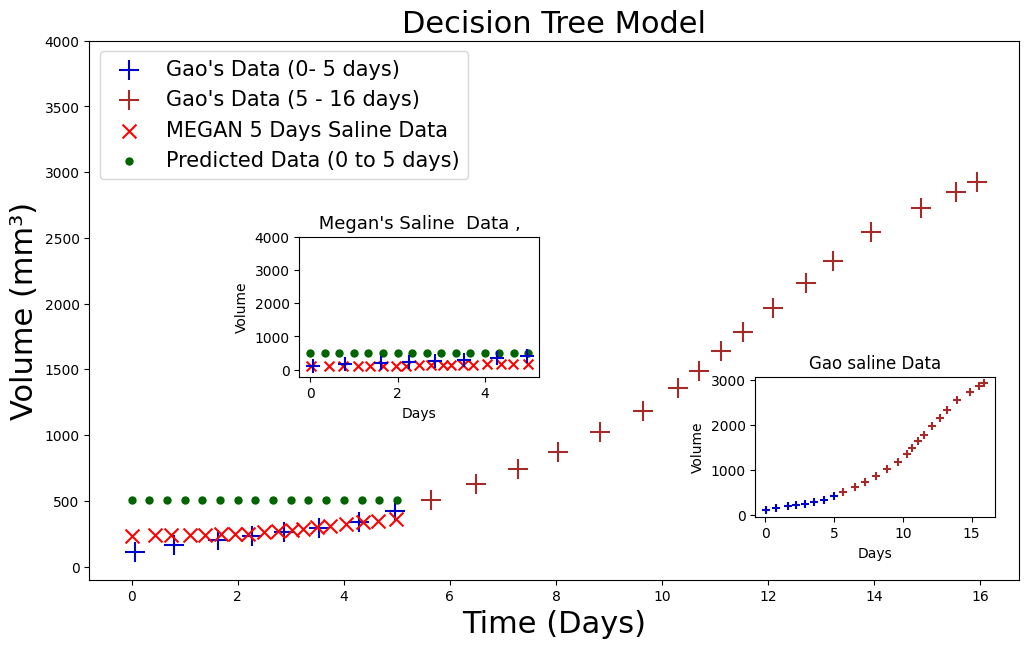

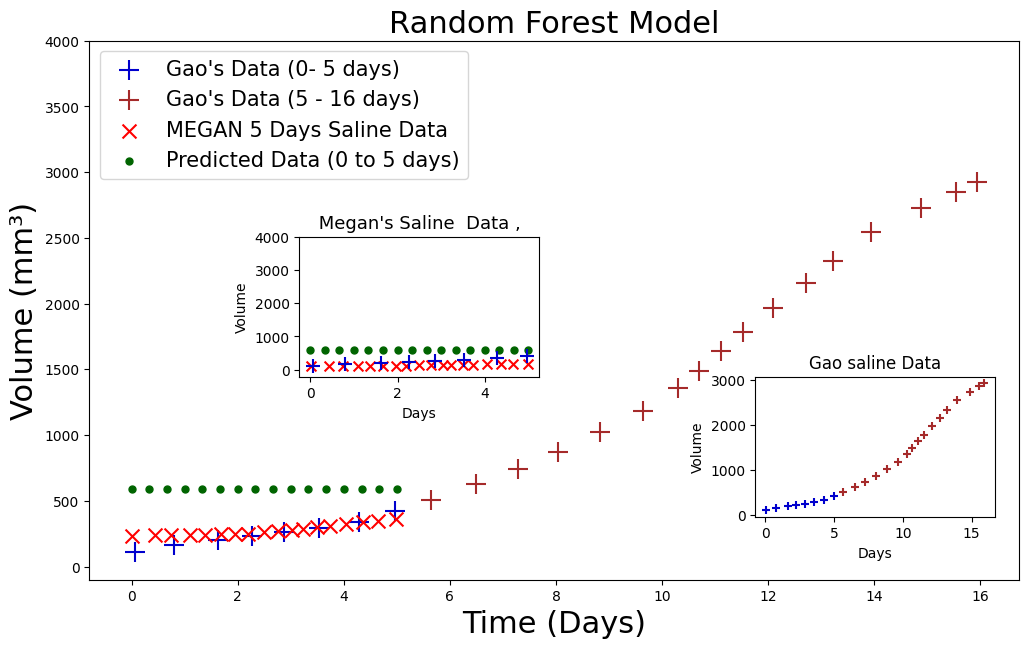

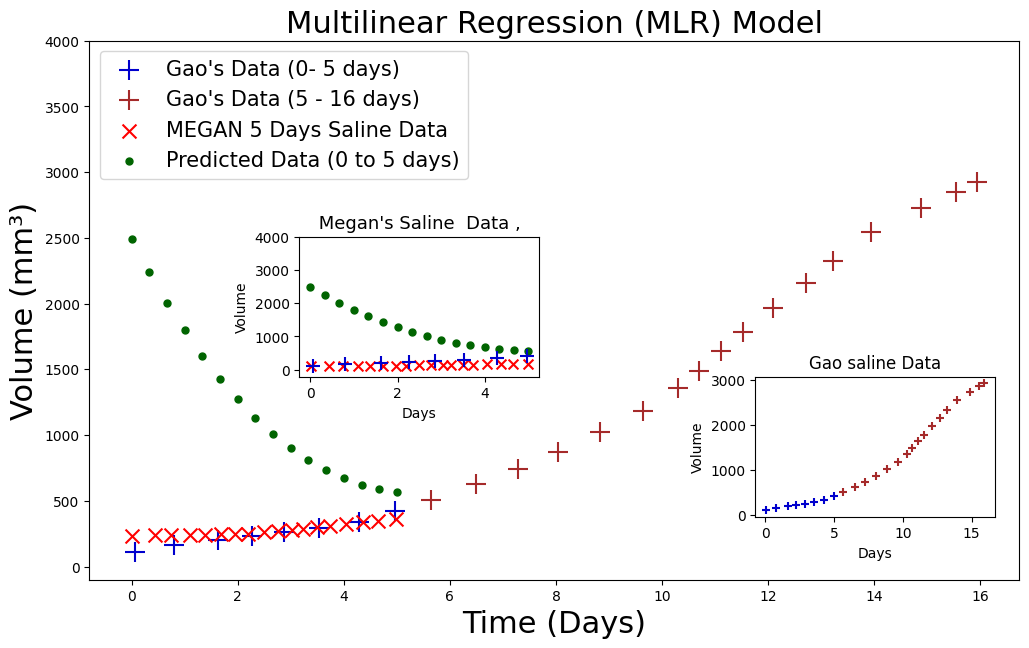

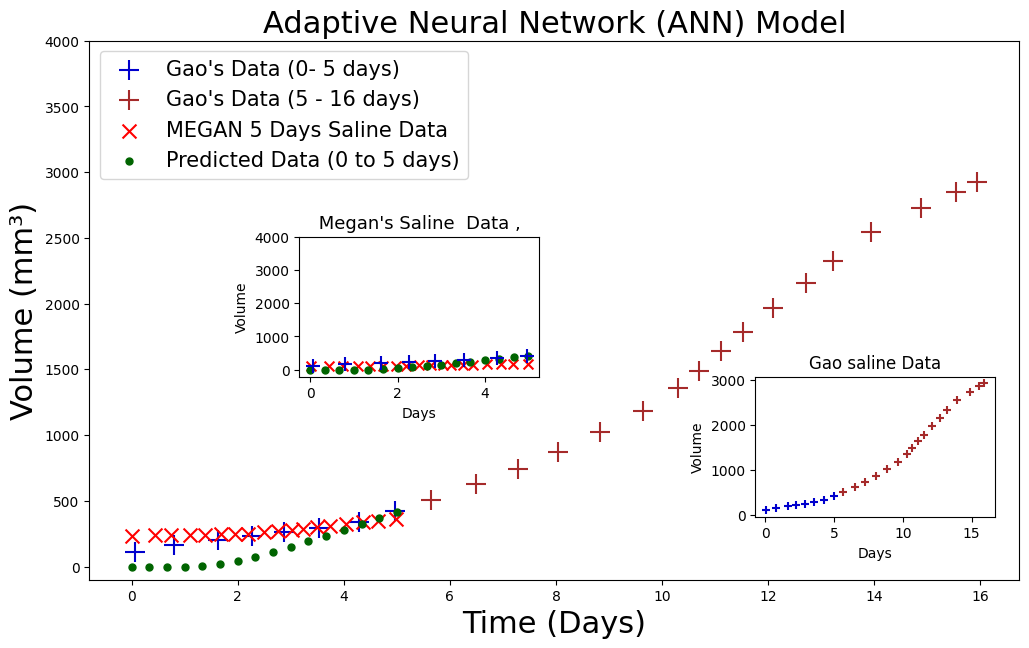

In [23]:

# Used datasets
Saline_gao = pd.read_csv('/Users/pracyaim/Downloads/salinegao.csv')
Saline_Land = pd.read_csv('/Users/pracyaim/Downloads/saline19.csv')

Saline_Land.columns = ['Time','Volume']

Saline_gao.columns = ['Time','Volume']



# Define the adaptive neural network model
adaptive_ann = MLPRegressor(hidden_layer_sizes=(2000, 50), activation='relu',
                            max_iter=5000, learning_rate='adaptive', 
                            early_stopping=True, n_iter_no_change=1000, 
                            random_state=42)


# Splitting the data into sets for different time ranges
df_G2 = Saline_gao[(Saline_gao['Time'] > 5) & (Saline_gao['Time'] <= 30)]

df_G1 = Saline_gao[(Saline_gao['Time'] > 0) & (Saline_gao['Time'] <= 5)]

X1_train, y1_train = df_G1['Time'].values.reshape(-1, 1), df_G1['Volume']
X2_train, y2_train = df_G2['Time'].values.reshape(-1, 1), df_G2['Volume']

# Define the polynomial regression pipeline
polynomial_regression = Pipeline([
    ('poly', PolynomialFeatures(degree=3)),
    ('linear', LinearRegression())
])

# The models 
models = {
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=70, max_depth=7, random_state=42),
    "Multilinear Regression (MLR)": polynomial_regression,
    "Adaptive Neural Network (ANN)": adaptive_ann
}

# creating individual plots
def create_plot(model_name, model):
    plt.figure(figsize=(12, 7))
    
    # Train the model
    model.fit(X2_train, y2_train)
    
    # Create a new DataFrame with 'Time' from 0 to 5 days
    time_values = np.linspace(0, 5, 16)
    df_new = pd.DataFrame({'Time': time_values})
    
    # Predict using the trained model on the new data
    predictions_new = model.predict(df_new['Time'].values.reshape(-1, 1))
    
    # Add predictions to the new DataFrame
    df_new['Predicted_Volume'] = predictions_new
    
    # Plotting the results
    plt.scatter(X1_train, y1_train, color='mediumblue',  marker='+', s=200, label="Gao's Data (0- 5 days)")
    plt.scatter(X2_train, y2_train, color='brown',marker='+', s=200, label="Gao's Data (5 - 16 days)")
    
    plt.scatter(Saline_Land['Time'], Saline_Land['Volume']*2, color='red', marker='x', s=100, label='MEGAN 5 Days Saline Data')
    plt.scatter(df_new['Time'], df_new['Predicted_Volume'], color='darkgreen', marker='.', s=100, label='Predicted Data (0 to 5 days)')
  
    plt.xlabel('Time (Days)', fontsize=22)
    plt.ylabel('Volume (mm³)', fontsize=22)
    plt.title(f"{model_name} Model",fontsize=22 )
    plt.legend(loc='upper left', fontsize= 15)
    plt.ylim(-100, 4000)

   
    # Land's saline Inset
    ax_inset1 = plt.axes([0.30, 0.40, 0.2, 0.2])
    ax_inset1.scatter(df['Time'], df['Volume'], color='red', marker='x', s=50)
    ax_inset1.scatter(df_new['Time'], df_new['Predicted_Volume'], color='darkgreen', marker='.', s=100, label='Predicted Data (0 to 5 days)')
    ax_inset1.scatter(X1_train, y1_train, color='mediumblue', marker='+', s=100, label='Qi Data (0 - 5 days)')
    ax_inset1.set_title(" Megan's Saline  Data , ", fontsize=13)
    ax_inset1.set_ylim(-209.5, 4000)
    ax_inset1.set_xlabel('Days', fontsize=10)
    ax_inset1.set_ylabel('Volume', fontsize=10)

    # Gao's saline Inset
    ax_inset2 = plt.axes([0.68, 0.2, 0.2, 0.2])
    ax_inset2.scatter(X1_train, y1_train, color='mediumblue', marker='+',label="Gao's Data (0 - 5 days)")
    ax_inset2.scatter(X2_train, y2_train, color='brown',marker='+', label="Gao's Data (5 - 16 days)")
    
    ax_inset2.set_title('Gao saline Data', fontsize=12)
    ax_inset2.set_xlabel('Days', fontsize=10)
    ax_inset2.set_ylabel('Volume', fontsize=10)

    plt.show()
# Create individual plots for each model
for model_name, model in models.items():
    create_plot(model_name, model)


# 6

In [24]:
### 6.(a,b,c,d)

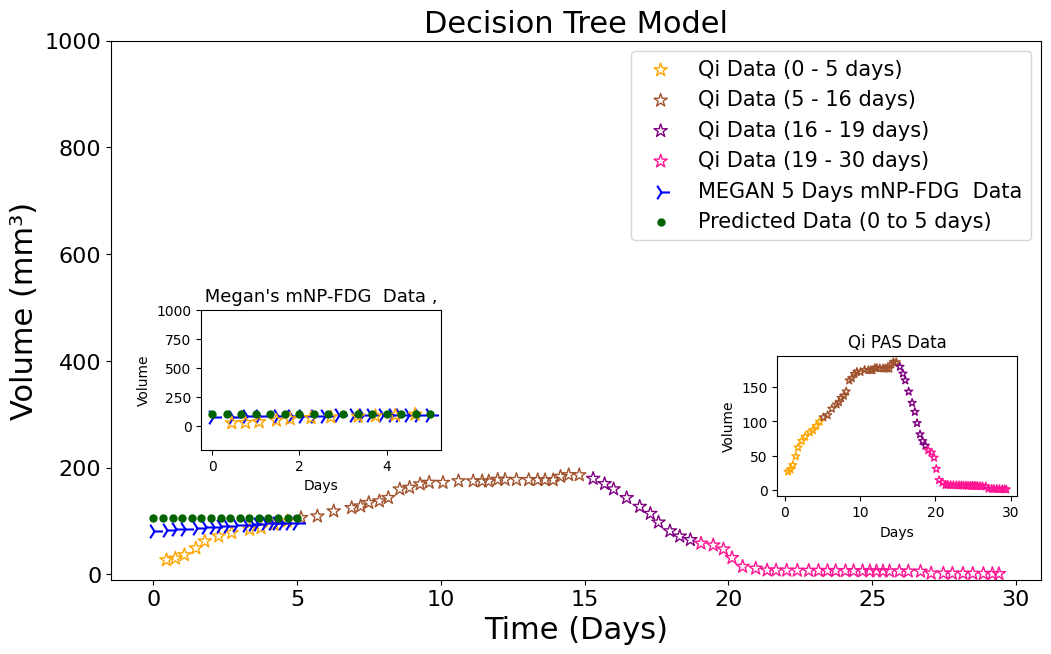

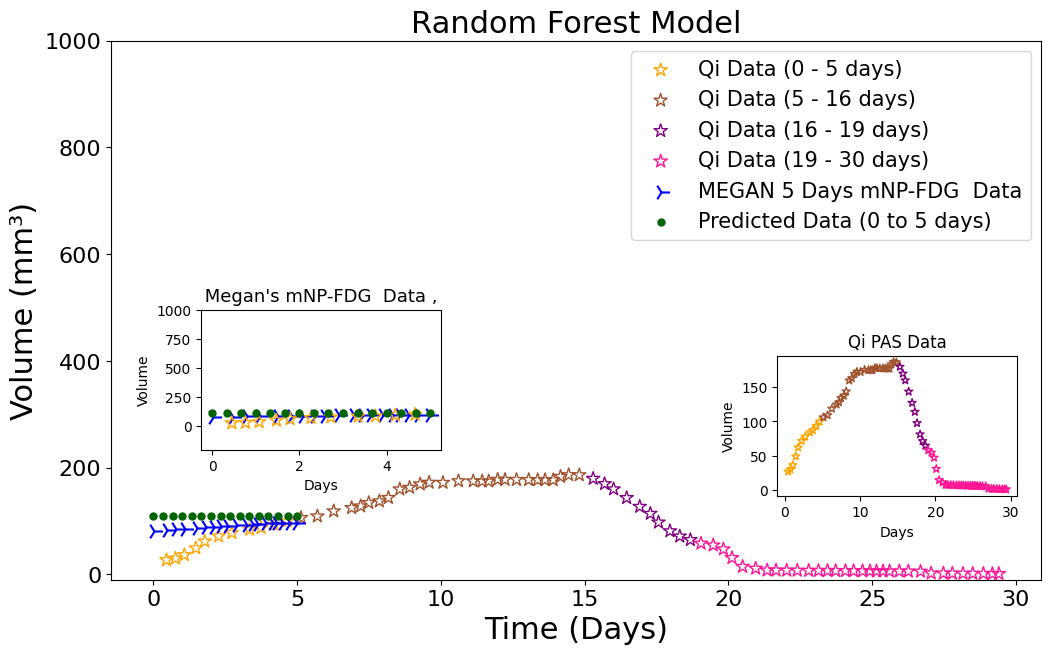

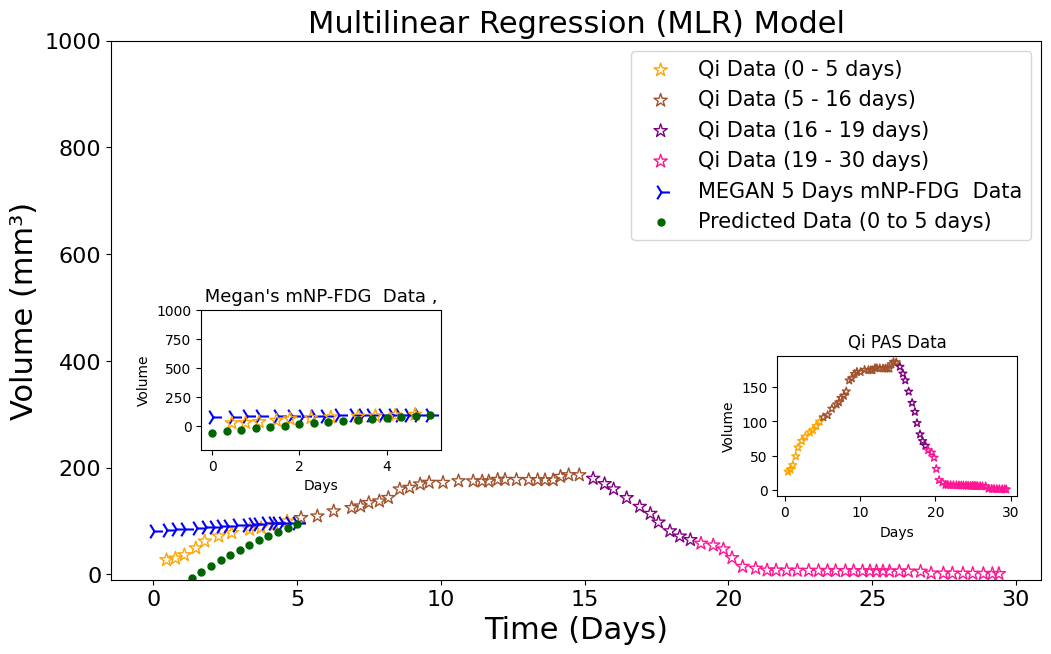

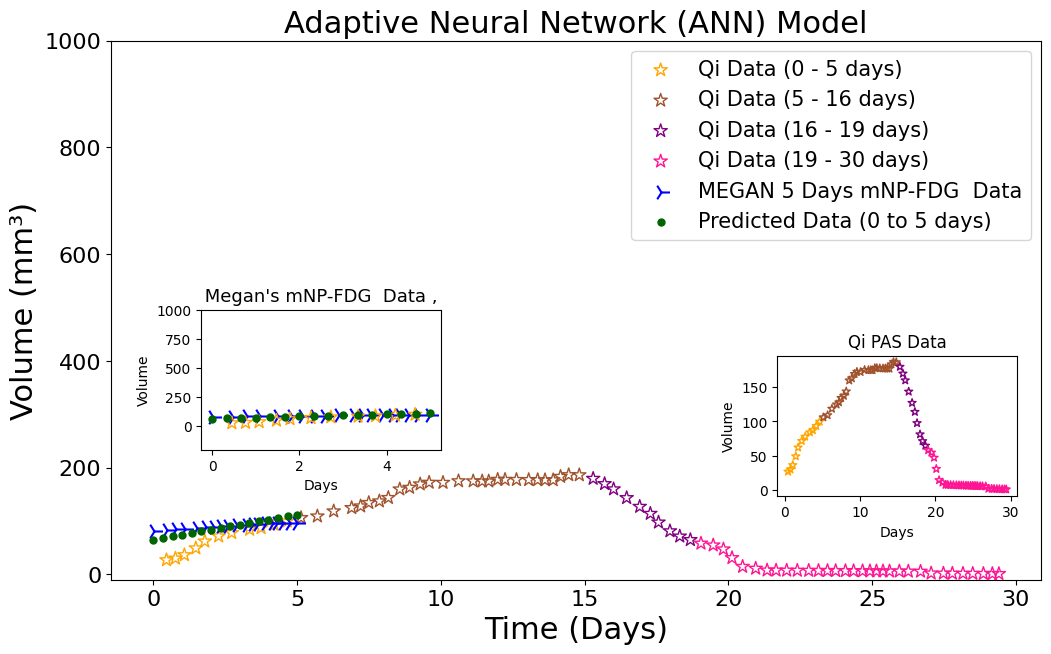

In [25]:

# Used datasets
PAS = pd.read_csv('/Users/pracyaim/Downloads/PAS80.csv')
PAS.columns = ['Time','Volume']

mnpfdg = pd.read_csv('/Users/pracyaim/Downloads/mnpfdg19.csv')
mnpfdg.columns = ['Time','Volume']

# Define the adaptive neural network model
adaptive_ann = MLPRegressor(hidden_layer_sizes=(20, 10), activation='relu',
                            max_iter=5000, learning_rate='adaptive', 
                            early_stopping=True, n_iter_no_change=500, 
                            random_state=42)

# Splitting the data into sets for different time ranges
df_Q1 = PAS[(PAS['Time'] > 5) & (PAS['Time'] <= 15)]
df_Q2 = PAS[(PAS['Time'] > 15) & (PAS['Time'] <= 19)]
df_Q3 = PAS[(PAS['Time'] > 19) & (PAS['Time'] <= 30)]
df_Q4 = PAS[(PAS['Time'] > 0) & (PAS['Time'] <= 5)]

X1_train, y1_train = df_Q1['Time'].values.reshape(-1, 1), df_Q1['Volume']
X2_train, y2_train = df_Q2['Time'].values.reshape(-1, 1), df_Q2['Volume']
X3_train, y3_train = df_Q3['Time'].values.reshape(-1, 1), df_Q3['Volume']
X4_train, y4_train = df_Q4['Time'].values.reshape(-1, 1), df_Q4['Volume']

# Define the polynomial regression pipeline
polynomial_regression = Pipeline([
    ('poly', PolynomialFeatures(degree=3)),
    ('linear', LinearRegression())
])

# The models 
models = {
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=70, max_depth=7, random_state=42),
    "Multilinear Regression (MLR)": polynomial_regression,
    "Adaptive Neural Network (ANN)": adaptive_ann
}

#Creating individual plots
def create_plot(model_name, model):
    plt.figure(figsize=(12, 7))
    
    # Train the model
    model.fit(X1_train, y1_train)
    
    # Create a new DataFrame with 'Time' from 0 to 5 days
    time_values = np.linspace(0, 5, 16)
    df_new = pd.DataFrame({'Time': time_values})
    
    # Predict using the trained model on the new data
    predictions_new = model.predict(df_new['Time'].values.reshape(-1, 1))
    
    # Add predictions to the new DataFrame
    df_new['Predicted_Volume'] = predictions_new
    
    # Plotting the first 5 days' predictions of Qi et al's PAS data against Land et al's Saline
    plt.scatter(X4_train, y4_train, color='orange',  marker='*', linestyle='None', facecolors='None', s=100, label='Qi Data (0 - 5 days)')
    plt.scatter(X1_train, y1_train, color='sienna', marker='*', linestyle='None', facecolors='None', s=100, label='Qi Data (5 - 16 days)')
    plt.scatter(X2_train, y2_train, color='purple',  marker='*', linestyle='None', facecolors='None', s=100, label='Qi Data (16 - 19 days)')
    plt.scatter(X3_train, y3_train, color='deeppink', marker='*', linestyle='None', facecolors='None', s=100, label='Qi Data (19 - 30 days)')
    plt.scatter(mnpfdg['Time'], (mnpfdg['Volume'] * 0.652), color='blue',marker='4', s=150, label='MEGAN 5 Days mNP-FDG  Data')
    plt.scatter(df_new['Time'], df_new['Predicted_Volume'], color='darkgreen', marker='.', s=100, label='Predicted Data (0 to 5 days)')
    plt.xticks(fontsize=16 )
    plt.yticks(fontsize=16)
    plt.ylim(-10, 1000)
    plt.xlabel('Time (Days)', fontsize=22)
    plt.ylabel('Volume (mm³)', fontsize=22)
    plt.title(f"{model_name} Model",fontsize=22 )
    plt.legend(loc='upper right', fontsize= 15)

    # Adding insets
    # Land's 
    ax_inset1 = plt.axes([0.2, 0.296, 0.2, 0.2])
    ax_inset1.scatter(mnpfdg['Time'], mnpfdg['Volume']*0.652, color='blue',marker='4', s=150)
    ax_inset1.scatter(X4_train, y4_train, color='orange',  marker='*', linestyle='None', facecolors='None', s=100, label='Qi Data (0 - 5 days)')
    ax_inset1.scatter(df_new['Time'], df_new['Predicted_Volume'], color='darkgreen', marker='.', s=100, label='Predicted Data (0 to 5 days)')
    ax_inset1.set_title(" Megan's mNP-FDG  Data , ", fontsize=13)
  
    ax_inset1.set_xlabel('Days', fontsize=10)
    ax_inset1.set_ylabel('Volume', fontsize=10)
    ax_inset1.set_ylim(-200, 1000)

    # Qi's
    ax_inset2 = plt.axes([0.68, 0.23, 0.2, 0.2])
    ax_inset2.scatter(X4_train, y4_train, color='orange', marker='*', linestyle='None', facecolors='None', label='Qi Data (0 - 5 days)')
    ax_inset2.scatter(X1_train, y1_train, color='sienna', marker='*', linestyle='None', facecolors='None', label='Qi Data (5 - 16 days)')
    ax_inset2.scatter(X2_train, y2_train, color='purple', marker='*', linestyle='None', facecolors='None', label='Qi Data (16 - 19 days)')
    ax_inset2.scatter(X3_train, y3_train, color='deeppink',marker='*', linestyle='None', facecolors='None', label='Qi Data (19 - 30 days)')
    ax_inset2.set_title('Qi PAS Data', fontsize=12)
    ax_inset2.set_xlabel('Days', fontsize=10)
    ax_inset2.set_ylabel('Volume', fontsize=10)

    plt.show()

# Create individual plots for each model
for model_name, model in models.items():
    create_plot(model_name, model)

# 7

## Tumour Predictions when treated with mNP-FDGs

Tumor volume will reach 0mm³ at t = 13.60 days


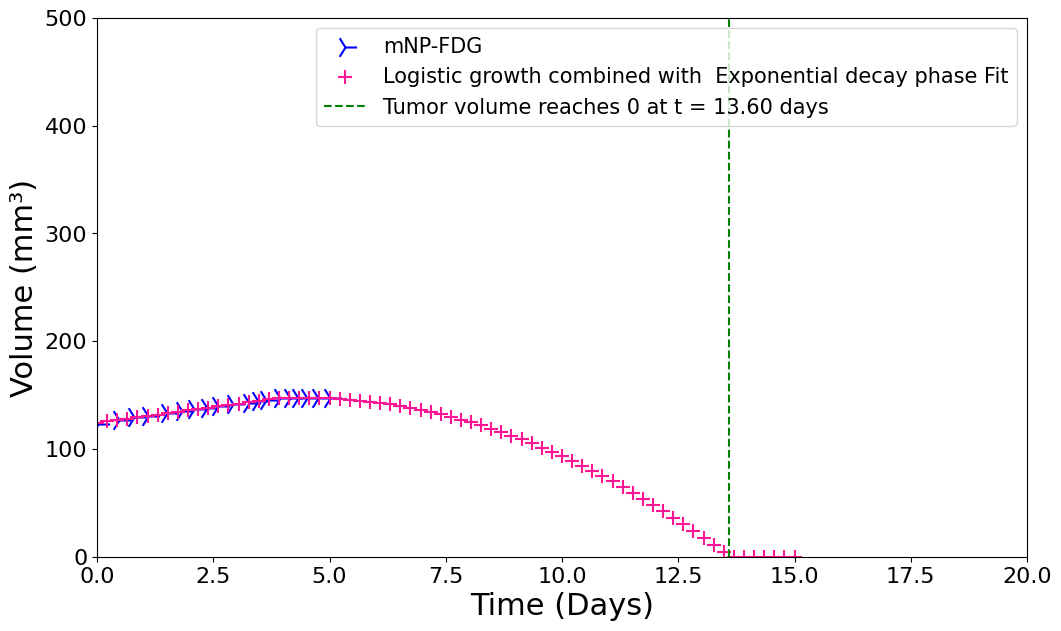

In [26]:
# Used datasets

PAS = pd.read_csv('/Users/pracyaim/Downloads/PAS70.csv')
mnpfdg = pd.read_csv('/Users/pracyaim/Downloads/mnpfdg19.csv')

mnpfdg.columns = ['Time', 'Volume']
PAS.columns = ['Time', 'Volume']


# logistic growth followed by slower exponential decay
def piecewise_logistic_growth_exponential_decay(t, A1, k1, A2, k2, t_switch, alpha, beta):
    
    # Logistic growth phase
    logistic_growth = A1 / (1 + np.exp(-k1 * (t - t_switch)))
    
    # Exponential decay phase, starting from t_switch
    decay = A2 * np.exp(-k2 * (t - t_switch)) - alpha * (t - t_switch) - beta * (t - t_switch)**2
    
    # Combining both phases
    return np.where(t < t_switch, logistic_growth, decay)

# Initials for parameters (A1, k1, A2, k2, t_switch, alpha, beta)
initial_guess = [147.68, 5.35, 0, 3.50, 4.74, 0.1, 0.9]

# Fit the piecewise logistic_growth_exponential_decay model to the data
popt, pcov = curve_fit(piecewise_logistic_growth_exponential_decay, mnpfdg['Time'], mnpfdg['Volume'], p0=initial_guess)

# the parameters
A1, k1, A2, k2, t_switch, alpha, beta = popt

#  prediction's time range
time_range = np.linspace(0,  15, 70)

#  model prediction
predicted_volume = piecewise_logistic_growth_exponential_decay(time_range, A1, k1, A2, k2, t_switch, alpha, beta)

# Ensuring predicted volume does not go below zero
predicted_volume = np.maximum(predicted_volume, 0)

# Define a function to find when the volume reaches zero during the decay phase
def decay_phase_zero(t):
    return piecewise_logistic_growth_exponential_decay(t, A1, k1, A2, k2, t_switch, alpha, beta)

# Time when the decay phase reaches zero
time_to_zero = fsolve(decay_phase_zero, t_switch + 1)[0]


#  predicted time 
print(f'Tumor volume will reach 0mm³ at t = {time_to_zero:.2f} days')

# Plotting the original data and the fitted curve
plt.figure(figsize=(12, 7))
plt.scatter(mnpfdg['Time'], mnpfdg['Volume'], color='blue',s= 280,marker='4', label='mNP-FDG')

plt.scatter(time_range, predicted_volume,marker='+',color ='deeppink',s=100, label='Logistic growth combined with  Exponential decay phase Fit')
plt.axvline(x=time_to_zero, color='g', linestyle='--', label=f'Tumor volume reaches 0 at t = {time_to_zero:.2f} days')
plt.xlabel('Time (Days)',fontsize=22)
plt.ylabel('Volume (mm³)', fontsize=22)
plt.ylim(0, 500)
plt.xlim(0, 20)
plt.legend(fontsize=15)
plt.title('')
plt.grid(False)
plt.xticks(fontsize=16 )
plt.yticks(fontsize=16)
plt.show()

# 8

## Tumour Predictions when treated with mNPs

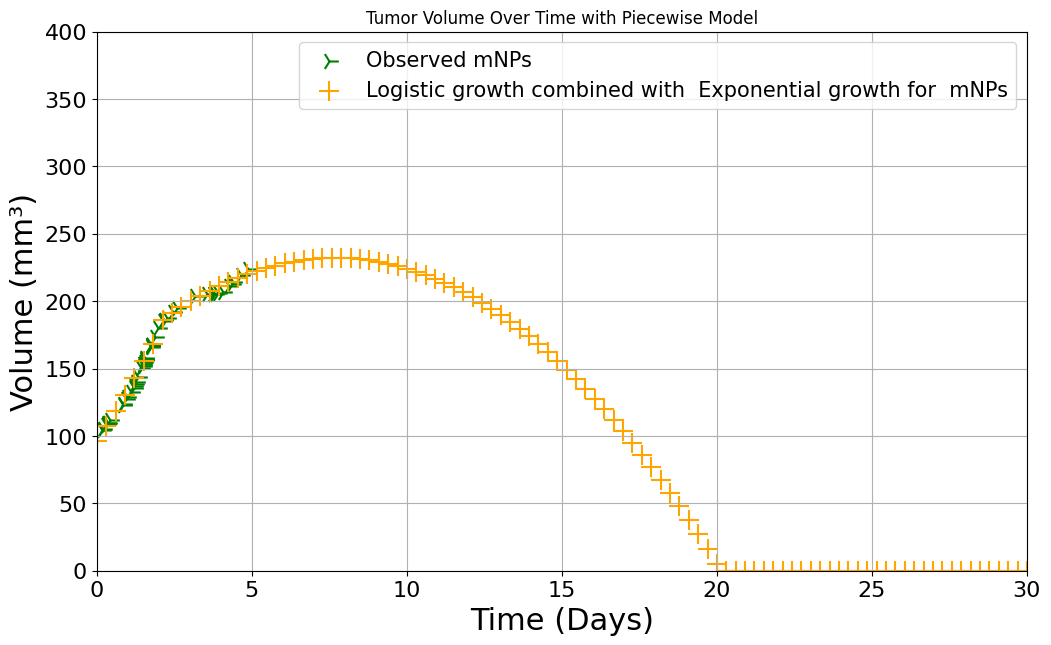

In [27]:


# Load and preprocess the data
df1 = pd.read_csv('/Users/pracyaim/Downloads/Mnps800.csv')
df1.columns = ['Time', 'Volume']


# Extract time and volume arrays

timem = df1['Time'].values 
volumem = df1['Volume'].values
 

# Randomly select  fewer data points

time = df1['Time'].values
volume = df1['Volume'].values
np.random.seed(42)  # Seed for reproducibility
indices = np.random.choice(len(time), 49, replace=False)
new_time = time[indices]
new_volume = volume[indices]

# Define the piecewise model function
def piecewise_model(t, A1, k1, A2, k2, t_switch, alpha, beta):
    # Logistic growth phase
    logistic_growth = A1 / (1 + np.exp(-k1 * (t - t_switch)))
    
    # Exponential decay phase
    decay = A2 * np.exp(-k2 * (t - t_switch)) - alpha * (t - t_switch) - beta * (t - t_switch)**2
    
    # Combine both phases
    return np.where(t < t_switch, logistic_growth, decay)

# Initial guesses for parameters

A1_initial = np.median(volumem)  # Maximum volume for logistic growth
k1_initial = 0.1          # Initial guess for logistic growth rate
A2_initial = np.median(volumem)  # Start of exponential decay phase
k2_initial = 0.01         # Decay rate for exponential phase
t_switch_initial = np.median(timem)  # Midpoint where logistic growth switches to exponential decay
alpha_initial = 0.1       # Initial guess for linear term in decay
beta_initial = 0.01       # Initial guess for quadratic term in decay

initial_guess = [A1_initial, k1_initial, A2_initial, k2_initial, t_switch_initial, alpha_initial, beta_initial]

# Fit the piecewise model to the data with bounds
try:
    popt, pcov = curve_fit(
        piecewise_model, 
        timem, 
        volumem, 
        p0=initial_guess, 
        bounds=([0, 0, 0, 0, 0, -np.inf, -np.inf], [np.inf, np.inf, np.inf, np.inf, np.inf, np.inf, np.inf]),
        maxfev=1000
    )
except RuntimeError as e:
    print(f"Error in fitting the model: {e}")
    popt = [np.nan] * 7  # Fallback values

# Extract fitted parameters
A1, k1, A2, k2, t_switch, alpha, beta = popt

# Define the function to find when volume reaches zero
def find_zero(t):
    return piecewise_model(t, A1, k1, A2, k2, t_switch, alpha, beta)




# Generate predictions over a range of time
time_rangem= np.linspace(0, 30, 100)
predicted_volumem = piecewise_model(time_rangem, *popt)

# Ensure predictions do not go below zero
predicted_volumem = np.maximum(predicted_volumem, 0)

# Plot the data and the fitted model
plt.figure(figsize=(12, 7))
plt.scatter(new_time, new_volume, color='green', s=180, marker='4', label='Observed mNPs')
plt.scatter(time_rangem, predicted_volumem,s=200, color='orange', marker='+', label='Logistic growth combined with  Exponential growth for  mNPs')


plt.xlabel('Time (Days)', fontsize=22)
plt.ylabel('Volume (mm³)', fontsize=22)
plt.xlim(0, 30)
plt.ylim(0, 400)
plt.legend(fontsize=15)
plt.title('Tumor Volume Over Time with Piecewise Model')
plt.grid(True)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

# 9

## Tumour Predictions when treated with Saline

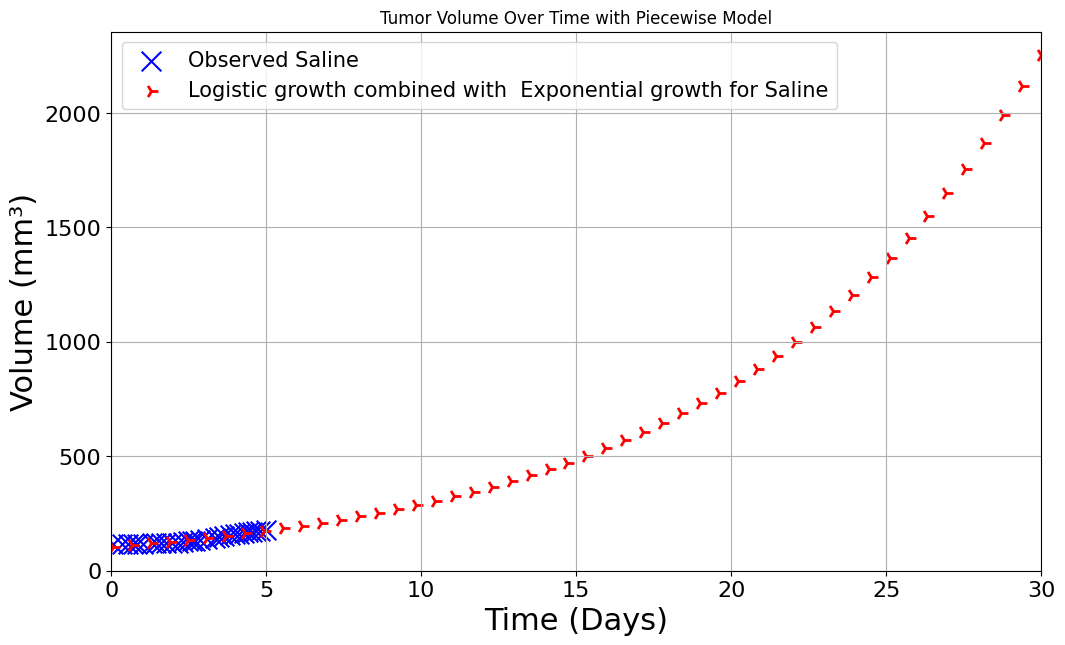

In [28]:

# Load and preprocess the data
data = pd.read_csv('/Users/pracyaim/Downloads/saline30.csv')
data.columns = ['Time', 'Volume']

# Extract time and volume arrays
time = data['Time'].values
volume = data['Volume'].values
# Randomly select  data points
np.random.seed(42)  # Seed for reproducibility
indices = np.random.choice(len(time), 30, replace=False)
new_time = time[indices]
new_volume = volume[indices]

# Define the piecewise model function with moderate exponential growth
def piecewise_model(t, A1, k1, t_switch, A2, k2):
    # Logistic growth phase
    logistic_growth = A1 / (1 + np.exp(-k1 * (t - t_switch)))
    
    # Moderate exponential growth phase
    exponential_growth = A2 * np.exp(k2 * (t - t_switch))
    
    # Combine both phases
    return np.where(t < t_switch, logistic_growth, logistic_growth[np.searchsorted(t, t_switch, side='left') - 1] + exponential_growth)

# Initial guesses for parameters
A1_initial = np.median(volume)  # Maximum volume for logistic growth
k1_initial = 0.1          # Initial guess for logistic growth rate
t_switch_initial = np.median(time)  # Midpoint where logistic growth switches to exponential growth
A2_initial = np.median(volume)  # Amplitude for exponential growth
k2_initial = 0.01         # Growth rate for exponential phase

initial_guess = [A1_initial, k1_initial, t_switch_initial, A2_initial, k2_initial]

# Fit the piecewise model to the data with bounds
try:
    popt, pcov = curve_fit(
        piecewise_model, 
        time, 
        volume, 
        p0=initial_guess, 
        bounds=([0, 0, 0, 0, 0], [np.inf, np.inf, np.inf, np.inf, 1]),  # Adjusted bounds for growth rate
        maxfev=10000
    )
except RuntimeError as e:
    print(f"Error in fitting the model: {e}")
    popt = [np.nan] * 5  # Fallback values

# Extract fitted parameters
A1, k1, t_switch, A2, k2 = popt

# Generate predictions over a range of time
time_range = np.linspace(0.05, 30, 50)
predicted_volume = piecewise_model(time_range, *popt)

# Plot the data and the fitted model
plt.figure(figsize=(12, 7))

# Scatter plot for observed data
plt.scatter(new_time, new_volume, color='blue', s=200, marker='x', label='Observed Saline')

# Plot for the fitted model predictions (connected by a line)
plt.scatter(time_range, predicted_volume, color='red', s=100, marker='4', linewidth=2, label='Logistic growth combined with  Exponential growth for Saline')

# Customizing the plot
plt.xlabel('Time (Days)', fontsize=22)
plt.ylabel('Volume (mm³)', fontsize=22)
plt.xlim(0, 30)
plt.ylim(0, max(predicted_volume) + 100)  # Adjust the upper limit for better visibility
plt.legend(fontsize=15)
plt.title('Tumor Volume Over Time with Piecewise Model')
plt.grid(True)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

# Show the plot
plt.show()

# 10

## Tumour Prediction when untreated

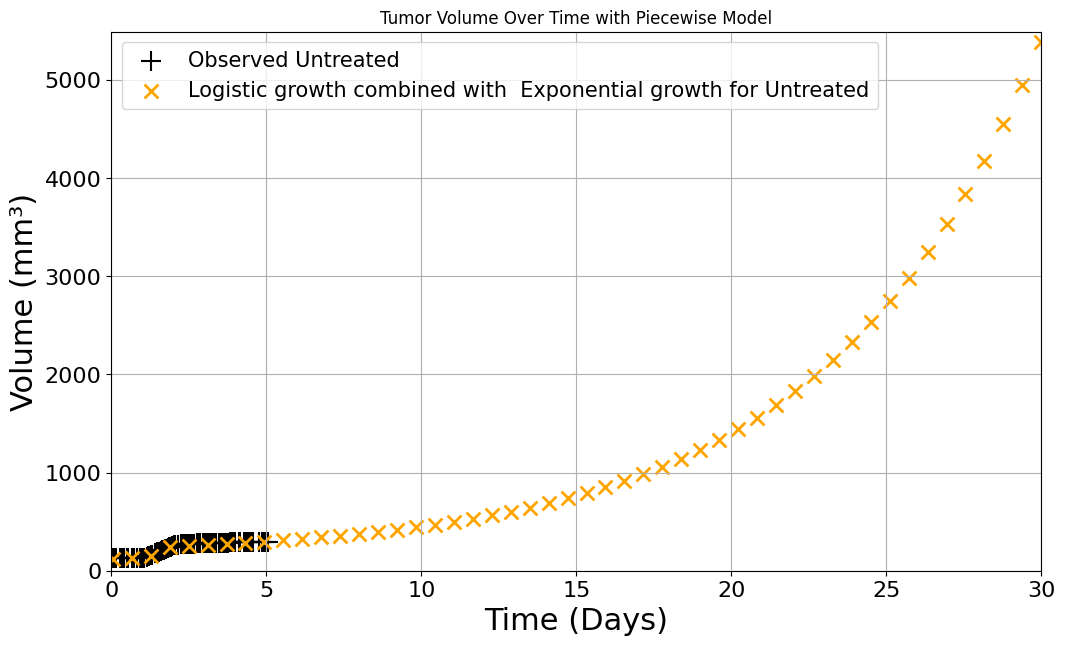

In [29]:


# Load and preprocess the data
data = pd.read_csv('/Users/pracyaim/Downloads/untreated85.csv')
data.columns = ['Time', 'Volume']

# Extract time and volume arrays
time = data['Time'].values
volume = data['Volume'].values
# Randomly select  data points
np.random.seed(42)  # Seed for reproducibility
indices = np.random.choice(len(time), 80, replace=False)
new_time = time[indices]
new_volume = volume[indices]

# Define the piecewise model function with moderate exponential growth
def piecewise_model(t, A1, k1, t_switch, A2, k2):
    # Logistic growth phase
    logistic_growth = A1 / (1 + np.exp(-k1 * (t - t_switch)))
    
    # Moderate exponential growth phase
    exponential_growth = A2 * np.exp(k2 * (t - t_switch))
    
    # Combine both phases
    return np.where(t < t_switch, logistic_growth, logistic_growth[np.searchsorted(t, t_switch, side='left') - 1] + exponential_growth)

# Initial guesses for parameters
A1_initial = np.median(volume)  # Maximum volume for logistic growth
k1_initial = 0.1          # Initial guess for logistic growth rate
t_switch_initial = np.median(time)  # Midpoint where logistic growth switches to exponential growth
A2_initial = np.median(volume)  # Amplitude for exponential growth
k2_initial = 0.01         # Growth rate for exponential phase

initial_guess = [A1_initial, k1_initial, t_switch_initial, A2_initial, k2_initial]

# Fit the piecewise model to the data with bounds
try:
    popt, pcov = curve_fit(
        piecewise_model, 
        time, 
        volume, 
        p0=initial_guess, 
        bounds=([0, 0, 0, 0, 0], [np.inf, np.inf, np.inf, np.inf, 1]),  # Adjusted bounds for growth rate
        maxfev=10000
    )
except RuntimeError as e:
    print(f"Error in fitting the model: {e}")
    popt = [np.nan] * 5  # Fallback values

# Extract fitted parameters
A1, k1, t_switch, A2, k2 = popt

# Generate predictions over a range of time
time_range = np.linspace(0.05, 30, 50)
predicted_volume = piecewise_model(time_range, *popt)

# Plot the data and the fitted model
plt.figure(figsize=(12, 7))

# Scatter plot for observed data
plt.scatter(new_time, new_volume, color='black', s=200, marker='+', label='Observed Untreated')

# Plot for the fitted model predictions (connected by a line)
plt.scatter(time_range, predicted_volume, color='orange', s=100, marker='x', linewidth=2, label='Logistic growth combined with  Exponential growth for Untreated')

# Customizing the plot
plt.xlabel('Time (Days)', fontsize=22)
plt.ylabel('Volume (mm³)', fontsize=22)
plt.xlim(0, 30)
plt.ylim(0, max(predicted_volume) + 100)  # Adjust the upper limit for better visibility
plt.legend(fontsize=15)
plt.title('Tumor Volume Over Time with Piecewise Model')
plt.grid(True)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

# Show the plot
plt.show()